# Análise Exploratória e Pré-Processamento de Dados para Machine Learning

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/thomaschiari/ML_AI-Training/blob/main/M1-Introduction/Exploratory-Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/thomaschiari/ML_AI-Training/blob/main/M1-Introduction/Exploratory-Preprocessing.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

### Autor: 
- [Thomas Chiari Ciocchetti de Souza](https://github.com/thomaschiari)

Grande parte de um projeto de Machine Learning se trata de entender o problema, avaliar os dados e prepará-los para o modelo. Neste notebook, vamos explorar algumas técnicas de análise exploratória e pré-processamento de dados.

Para um dataset, podemos ter diversos tipos de variáveis, como numéricas, categóricas, ordinais, binárias, etc. Cada tipo de variável requer um tratamento diferente. Além disso, podemos ter dados faltantes, outliers, variáveis altamente correlacionadas, etc.

Portanto, nessa etapa, é necessário: 
- Entender o problema
- Entender os tipos de dados
- Entender os dados faltantes e como tratá-los
- Compreender a natureza das variáveis categoricas e como tratá-las
- Feature Engineering
- Análise estatística dos dados

Nos dois primeiros itens, o necessário a se fazer é se debruçar sobre os dados, conversar com quem já conhece o problema; ainda não estamos falando de código. Os itens seguintes já envolvem código, mas ainda não estamos falando de modelos de Machine Learning.

## Parte 1: Tratamento de Dados e Estatísticas Descritivas

Para a análise exploratória, utilizaremos o dataset [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), disponível no Kaggle. O objetivo é prever o preço de venda de casas em Ames, Iowa, EUA, com base em diversas variáveis explicativas. Se trata de um problema de regressão, visto que estamos buscando prever um valor contínuo.

In [211]:
import os
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/thomaschiari/ML_AI-Training/main/M1-Introduction/data/house-prices/"
TRAIN_PATH = "train.csv"
TEST_PATH = "test.csv"
TXT_PATH = "data_description.txt"
TRAIN_URL = DOWNLOAD_ROOT + TRAIN_PATH
TEST_URL = DOWNLOAD_ROOT + TEST_PATH
TXT_URL = DOWNLOAD_ROOT + TXT_PATH
DATA_PATH = os.path.join("data", "house-prices")

def fetch_data(data_url, data_path):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    csv_path = os.path.join(data_path, data_url.split('/')[-1])
    if not os.path.isfile(csv_path):
        urllib.request.urlretrieve(data_url, csv_path)

fetch_data(TRAIN_URL, DATA_PATH)

In [212]:
import pandas as pd
import numpy as np
import warnings
import logging
warnings.filterwarnings('ignore')
logging.basicConfig(level=logging.INFO)

In [213]:
PATH_TRAIN = os.path.join('data', 'house-prices', 'train.csv')
PATH_TEST = os.path.join('data', 'house-prices', 'test.csv')

In [214]:
dataset = pd.read_csv(PATH_TRAIN, encoding='utf-8')
dataset_test = pd.read_csv(PATH_TEST, encoding='utf-8')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [215]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Nesse dataset, temos 79 variáveis explicativas, que podem ser numéricas ou categóricas, e uma variável resposta, além de uma variável identificadora. A variável resposta é, obviamente, a que desejamos prever, e a variável identificadora é apenas um identificador único para cada casa. É possível que essa variável não seja útil para o modelo, mas, por enquanto, vamos mantê-la. é possível encontrar a descrição de cada variável no arquivo [`data_description.txt`](data/house-prices/data_description.txt).

Vamos iniciar com uma descrição geral do dataset, obtendo algumas informações básicas sobre as variáveis, como tipos, valores faltantes, médias, desvios e quartis. Para isso, utilizaremos a biblioteca `pandas`, que é uma das mais utilizadas para manipulação de dados em Python.

In [216]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [217]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Agora, vamos entender melhor nossa variável resposta. Vamos plotar um histograma para entender sua distribuição, junto com algumas métricas importantes para verificar sua distribuição.

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
df = dataset.copy()
df_t = dataset_test.copy()

<Axes: xlabel='SalePrice', ylabel='Density'>

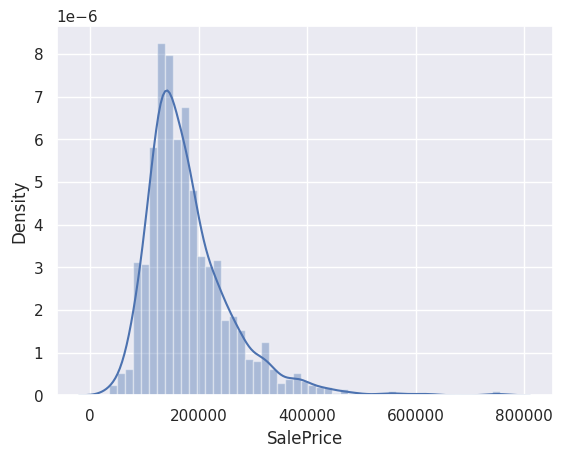

In [219]:
sns.distplot(df['SalePrice'])

In [220]:
# Skewness and Kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Podemos observar que a variável resposta não é normalmente distribuída, o que pode ser um problema para alguns modelos de regressão. Além disso, temos alguns outliers, que podem prejudicar o modelo. Vamos verificar a presença de outliers com um boxplot.

<Axes: >

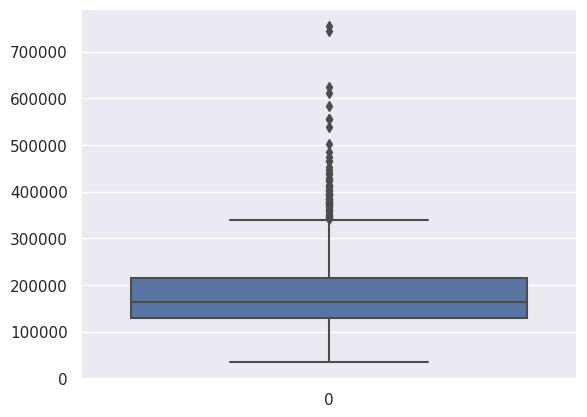

In [221]:
sns.boxplot(df['SalePrice'])

Como pode ser visualizado, existem alguns outliers na variável resposta. Vamos realizar, agora, uma log transformação da variável resposta, deixando-a mais próxima de uma distribuição normal, suavizando a presença de outliers. Em seguida, vamos avaliar essa nova variável visualmente. 

Skewness: 0.121335
Kurtosis: 0.809532


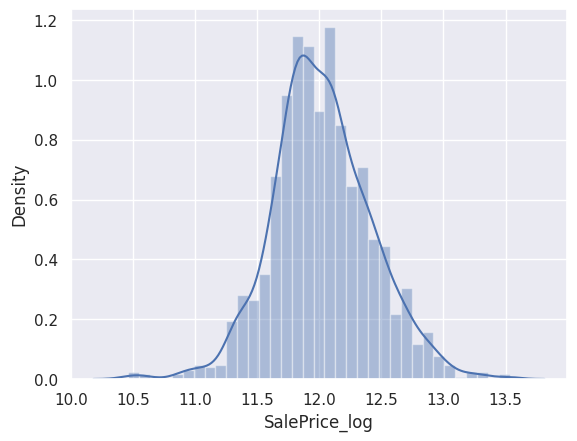

In [222]:
df['SalePrice_log'] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice_log'])

# Skewness and Kurtosis
print("Skewness: %f" % df['SalePrice_log'].skew())
print("Kurtosis: %f" % df['SalePrice_log'].kurt())

<Axes: >

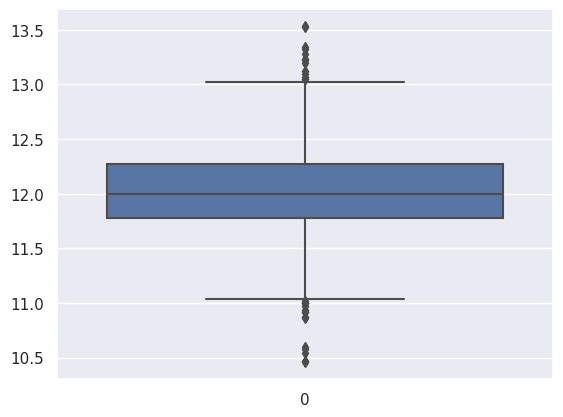

In [223]:
sns.boxplot(df['SalePrice_log'])

Como podemos observar, a distribuição da variável resposta se aproxima de uma distribuição normal, e os outliers foram suavizados. Skewness e Curtosis são duas métricas estatísticas que medem o grau de assimetria e curtose de uma distribuição, respectivamente. Uma distribuição normal possui Skewness e Curtosis iguais a 0, portanto quanto mais próximas de zero em um dataset, mais próximo de uma normal a distribuição está.

Agora, vamos verificar as variáveis numéricas e categóricas, além de identificar os valores faltantes.

In [224]:
var_numericas = df.dtypes[df.dtypes != 'object'].index
print(f'Número de variáveis numéricas: {len(var_numericas)}')
var_numericas

Número de variáveis numéricas: 39


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_log'],
      dtype='object')

In [225]:
var_cat = df.dtypes[df.dtypes == 'object'].index
print(f'Número de variáveis categóricas: {len(var_cat)}')
var_cat

Número de variáveis categóricas: 43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [226]:
valores_na = df.isnull().sum().sort_values(ascending=False)
porcentagem = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
df_na = pd.concat([valores_na, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
df_na.head(20)

,Total,Porcentagem
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479


Aqui, podemos ver algumas variáveis com grande quantidade de valores faltantes. Algumas, como `PoolQC`, `MiscFeature`, `Alley` e `Fence`, possuem mais de 80% dos valores faltantes, pois avaliam, de acordo com a documentação, a qualidade da piscina, a presença de recursos diversos não descritos nos demais dados, a qualidade da cerca, o tipo de via de acesso à propriedade... Portanto, em caso de falta de tais itens, é possível que o valor não tenha sido preenchido. Portanto, por enquanto, vamos preencher tais valores faltantes com a string `None`, representando a ausência de tais itens. Vamos fazer isso para todas as variáveis que se enquadram em tal situação, de acordo com a documentação.

In [227]:
# Separando as colunas que NaN tem algum significado
colunas_fill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in colunas_fill:
    df[col].fillna('None', inplace=True)
    df_t[col].fillna('None', inplace=True)

Agora realizaremos novamente a análise de faltantes. 

In [228]:
valores_na = df.isnull().sum().sort_values(ascending=False)
porcentagem = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
df_na = pd.concat([valores_na, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
df_na.head()

,Total,Porcentagem
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000


Os demais valores faltantes não possuem algum significado, e existem diversas técnicas para preenchê-los. Vamos utilizar, aqui, a técnica de preenchimento por média e por moda.

In [229]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)
df.GarageYrBlt.fillna(df.GarageYrBlt.mode(), inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(), inplace=True)

df_t.LotFrontage.fillna(df_t.LotFrontage.mean(), inplace=True)
df_t.GarageYrBlt.fillna(df_t.GarageYrBlt.mode(), inplace=True)
df_t.MasVnrArea.fillna(df_t.MasVnrArea.mean(), inplace=True)

In [230]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,12.429216


## Parte 2: Análise Exploratória

### 2.1. Analisando variáveis numéricas

Agora vamos realmente visualizar o que está acontecendo com os nossos dados. Vamos realizar uma matriz de correlação, para entender a relação entre as variáveis numéricas. Em seguida, utilizaremos histogramas, boxplots e gráficos de dispersão para entender a relação entre as variáveis numéricas e a variável resposta. Por fim, utilizaremos gráficos de barras para entender a relação entre as variáveis categóricas e a variável resposta. Para isso, utilizaremos a biblioteca `seaborn`, que é uma das mais utilizadas para visualização de dados em Python.

Para visualização, `bokeh` e `plotly` são duas bibliotecas muito interessantes, que permitem interação com os gráficos. Para quando estamos com pressa, a biblioteca `sweetviz` gera um relatório completo sobre o dataset, com diversas informações estatísticas e gráficos, de forma muito rápida, porém menos customizável. Recomendamos pesquisar um pouco sobre cada uma dessas bibliotecas, pois são muito úteis para análise exploratória.

In [231]:
df_num = df.select_dtypes(exclude='object')

In [232]:
def plotcorr(df, size, target):
    corr = df.corr(method='kendall')
    corrabs = corr.abs()
    cols = corrabs.nlargest(size, target)[target].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                    yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

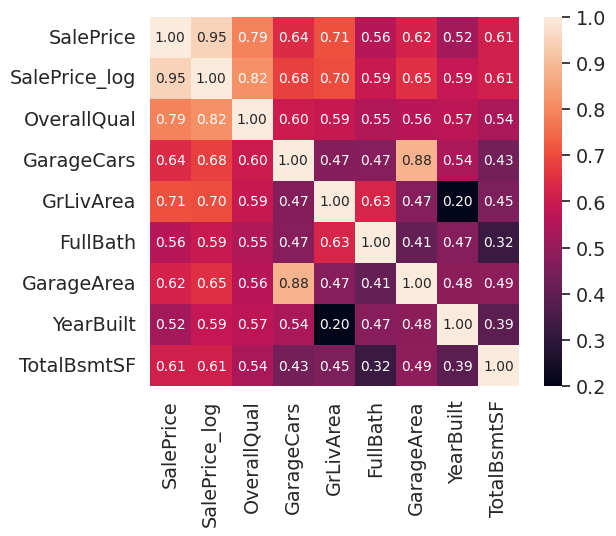

In [233]:
plotcorr(df_num, 9, 'SalePrice_log')

Acima, temos a matriz de correlação com as 10 variáveis mais correlacionadas com a variável resposta. Podemos observar que a variável `OverallQual` é a mais correlacionada com a variável resposta. Também podemos observar a correlação entre as variáveis explicativas, o que pode ser útil para a seleção de variáveis e engenharia de features. Precisamos ficar atentos a variáveis altamente correlacionadas, pois podem causar problemas para alguns modelos de Machine Learning, como a Multicolinearidade. Por exemplo, podemos repensar a presença das duas variáveis `GarageCars` e `GarageArea`, pois possuem uma alta correlação e podem estar representando a mesma coisa. Contudo, a existência de correlação entre as variáveis e a variável resposta demonstra que há algo a ser explorado. Em seguida, vamos explorar algumas dessas variáveis numéricas com histogramas.

In [234]:
df_num.drop(['Id'], axis=1, inplace=True)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

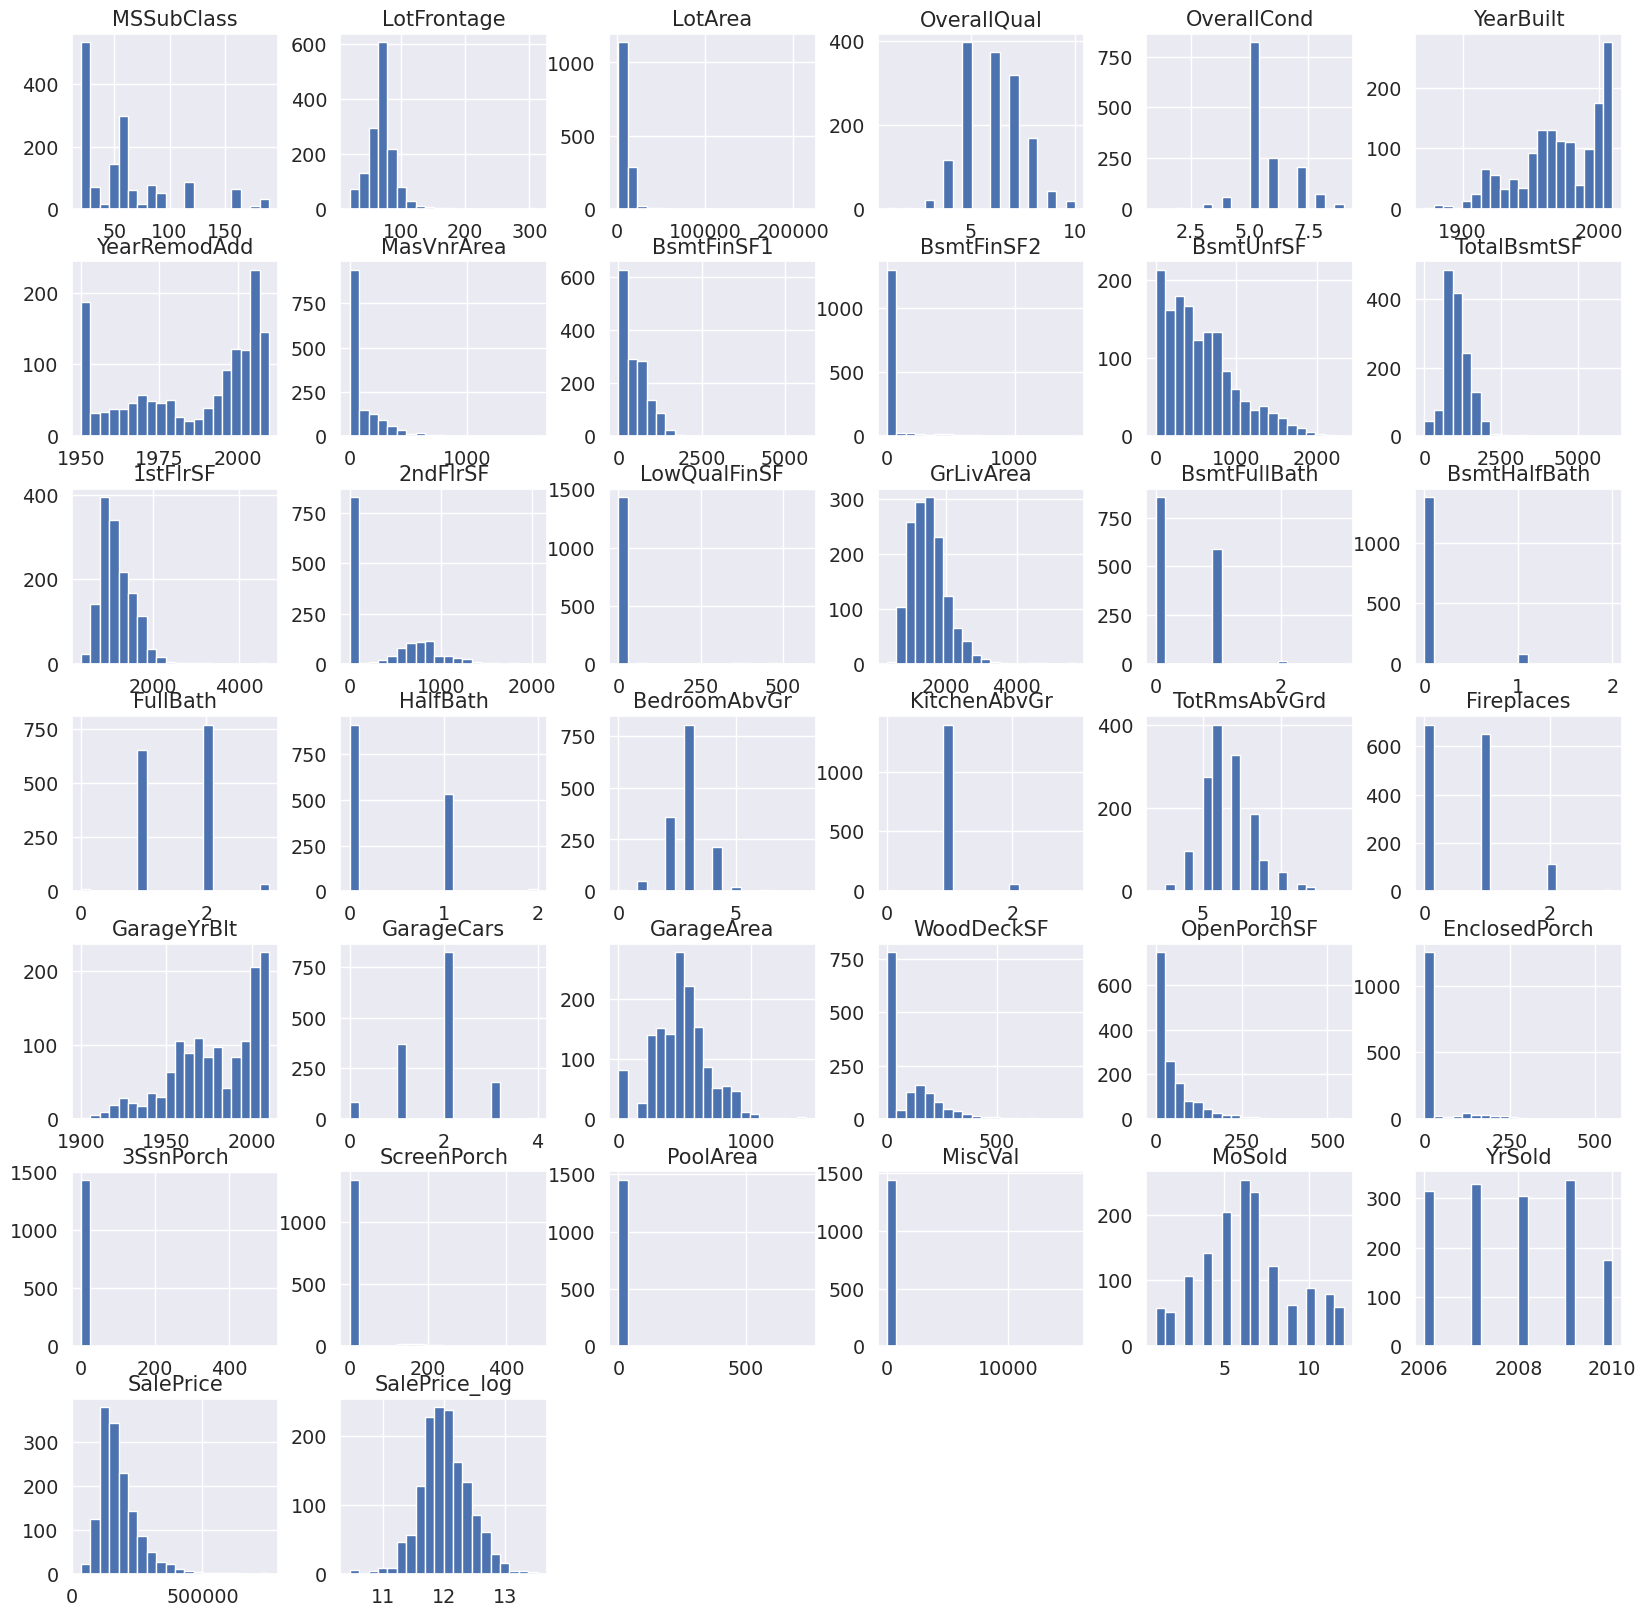

In [235]:
df_num.hist(figsize=(20,20), bins=20)

Aqui temos alguns insights interessantes para observarmos mais a fundo. Algumas features que chamam a atenção, a princípio, são as que claramente possuem outliers, e as com extrema concentração em uma das caudas da distribuição. Vamos observá-las mais a fundo com histogramas e boxplots.

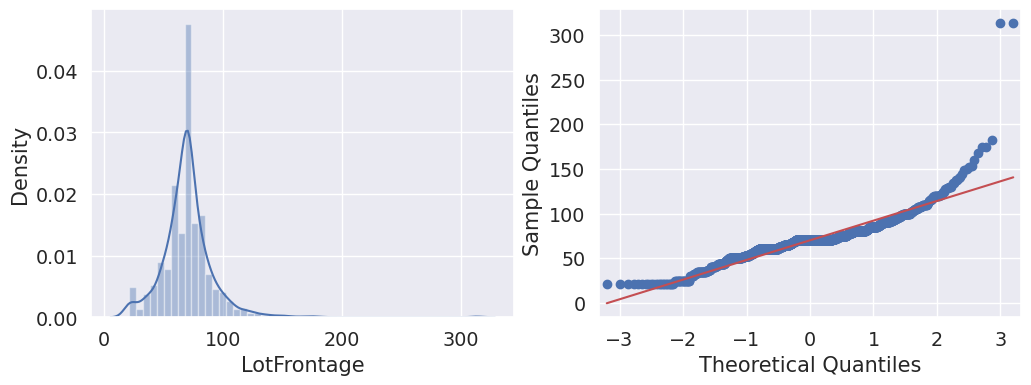

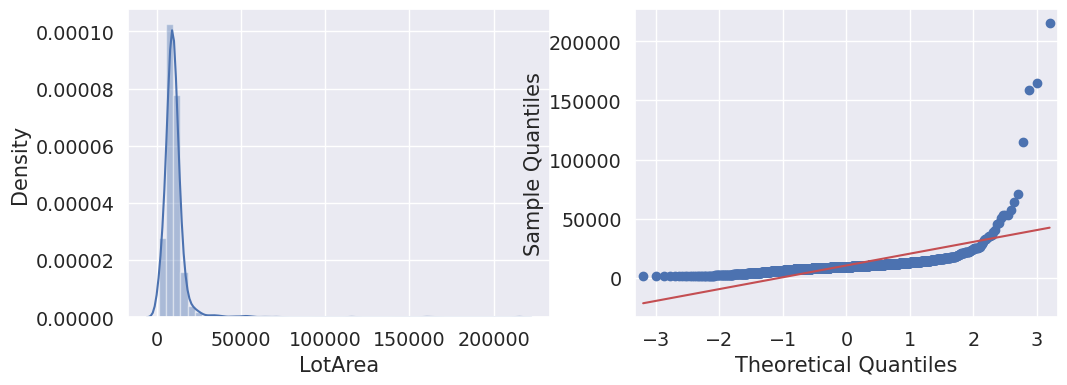

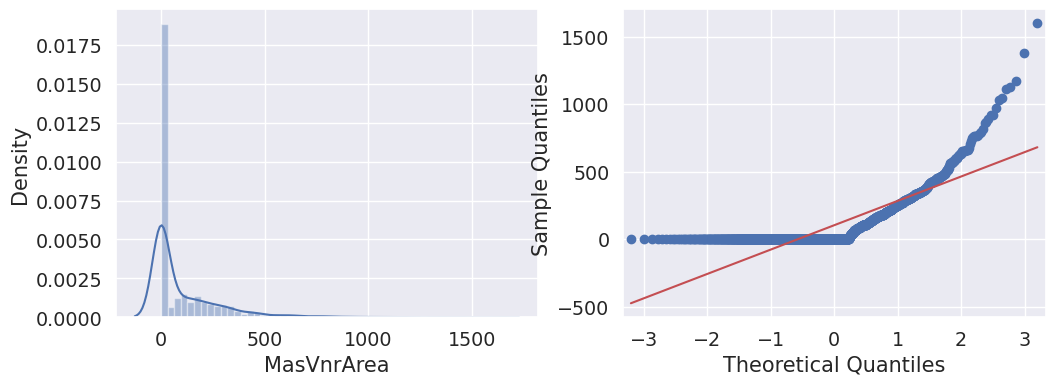

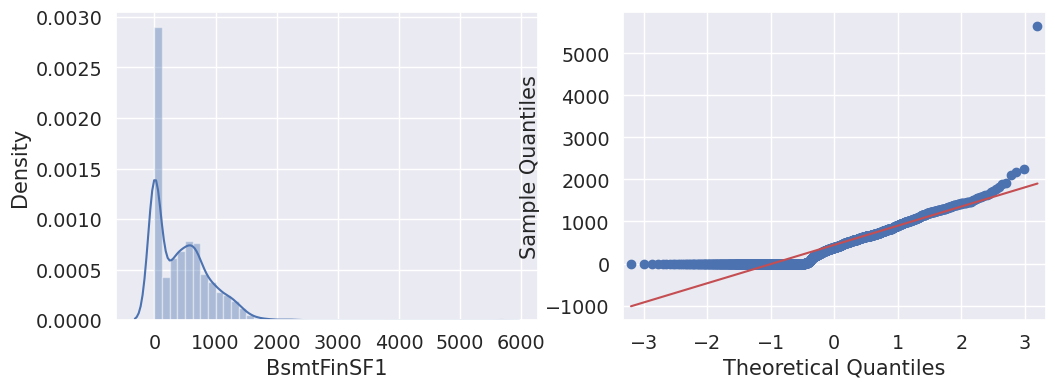

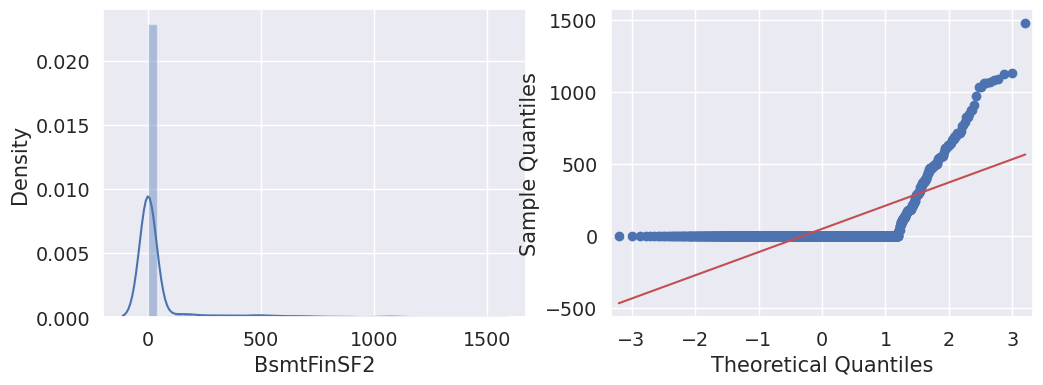

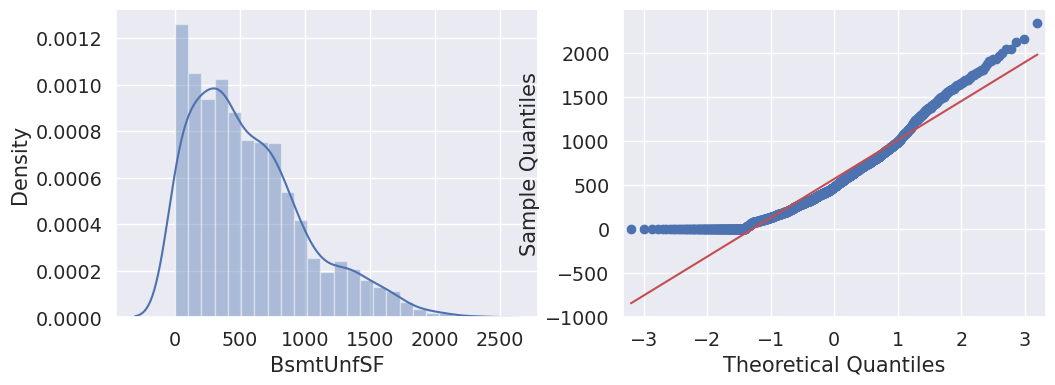

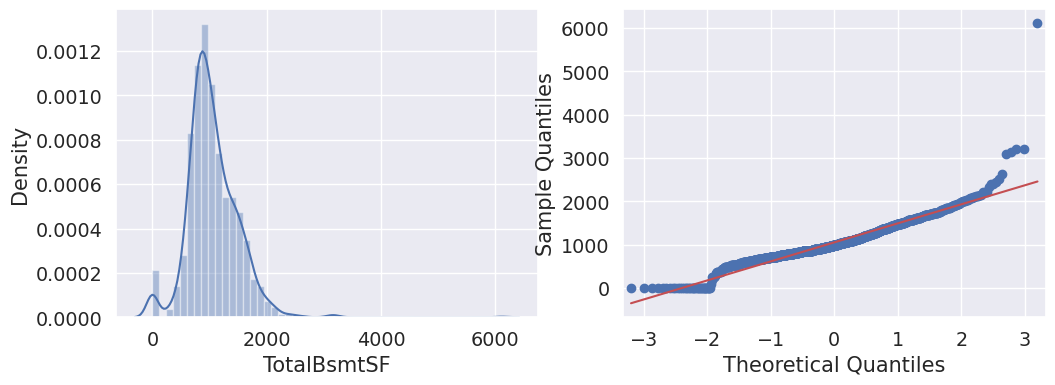

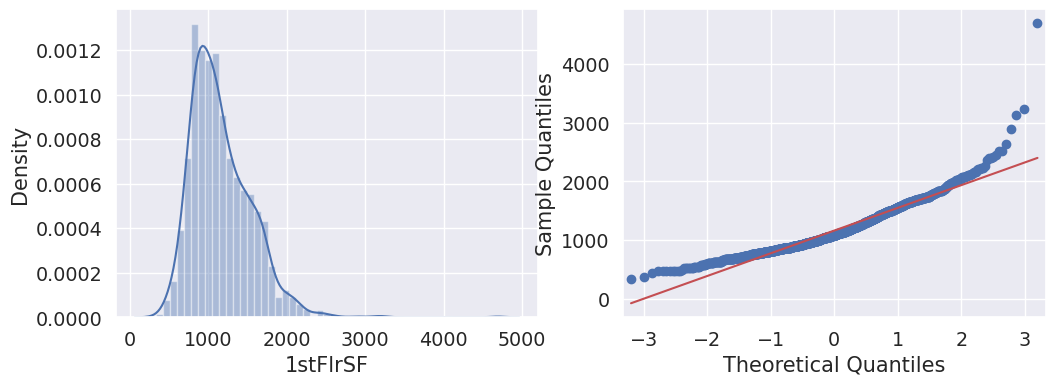

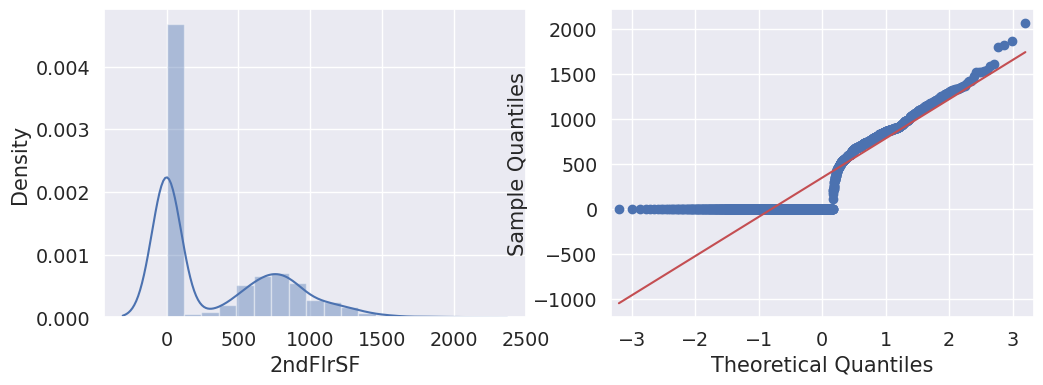

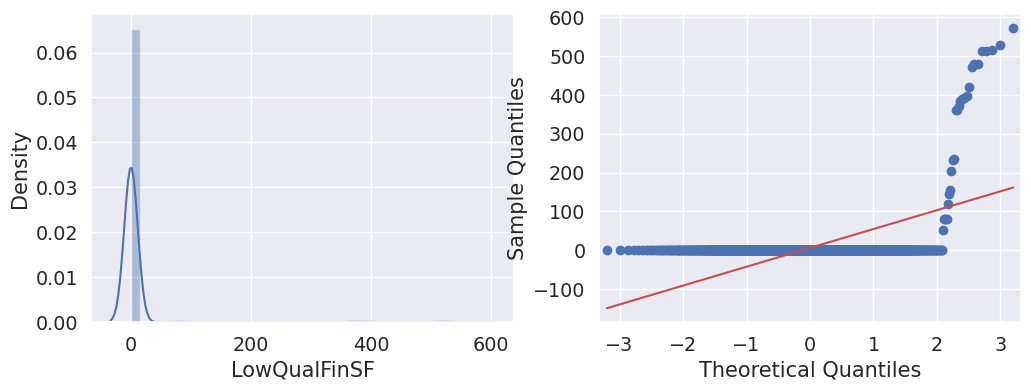

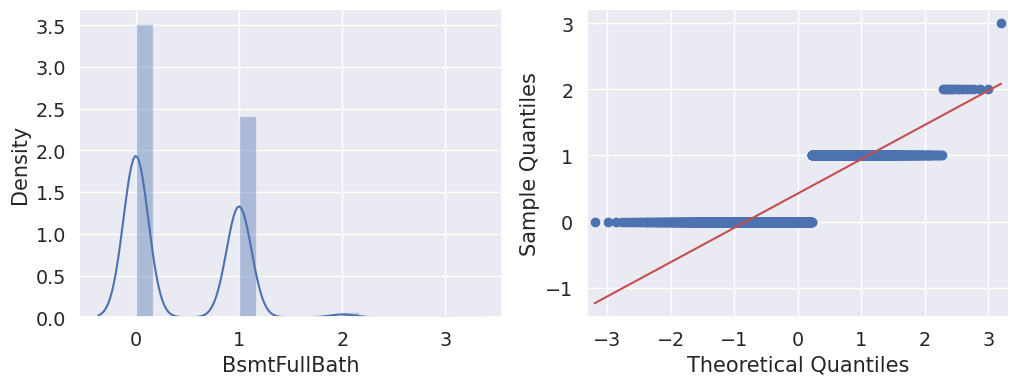

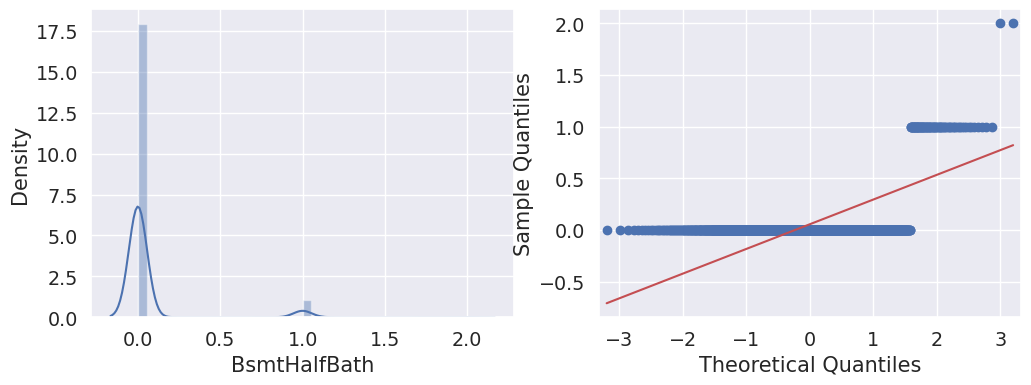

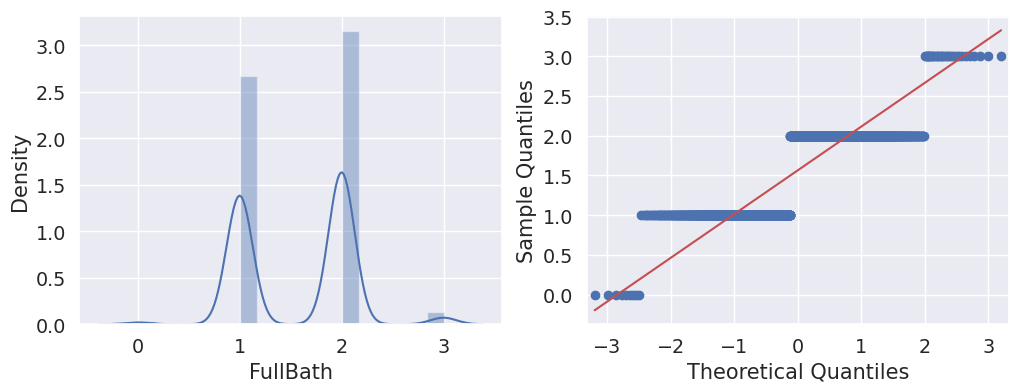

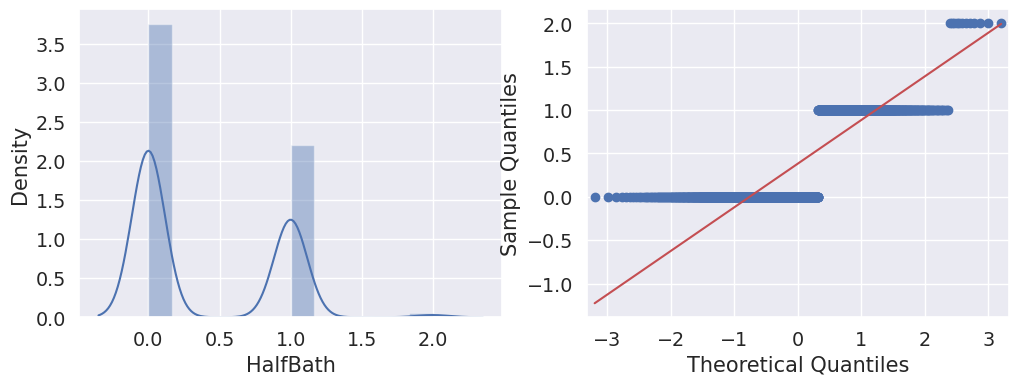

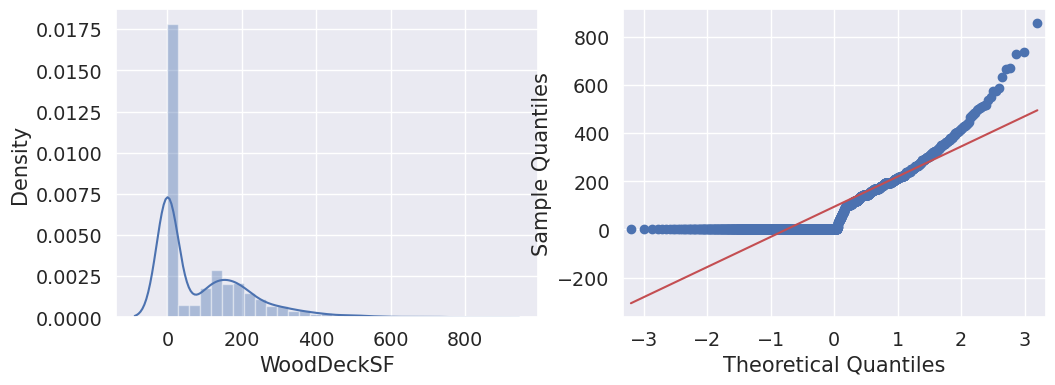

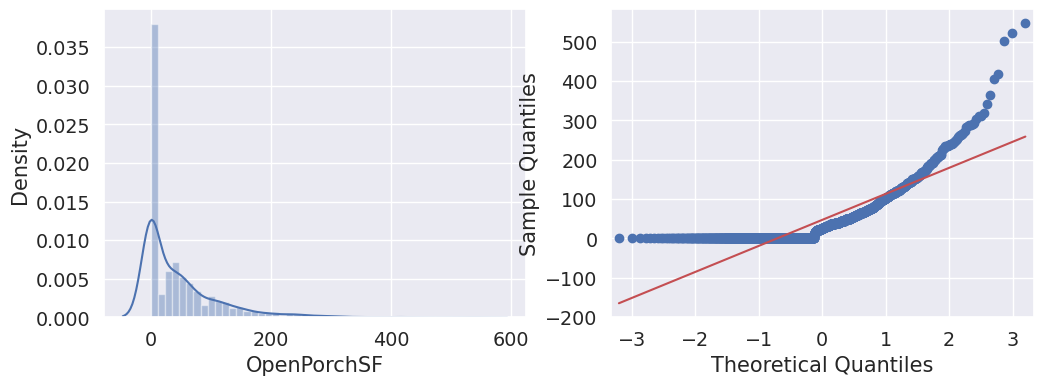

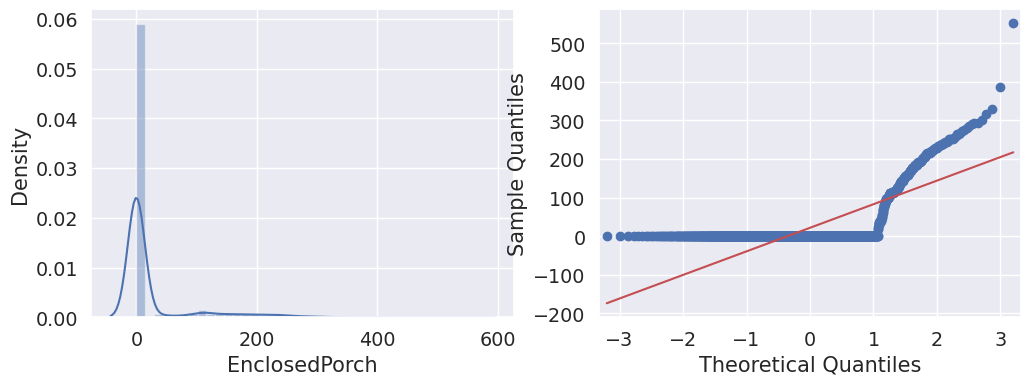

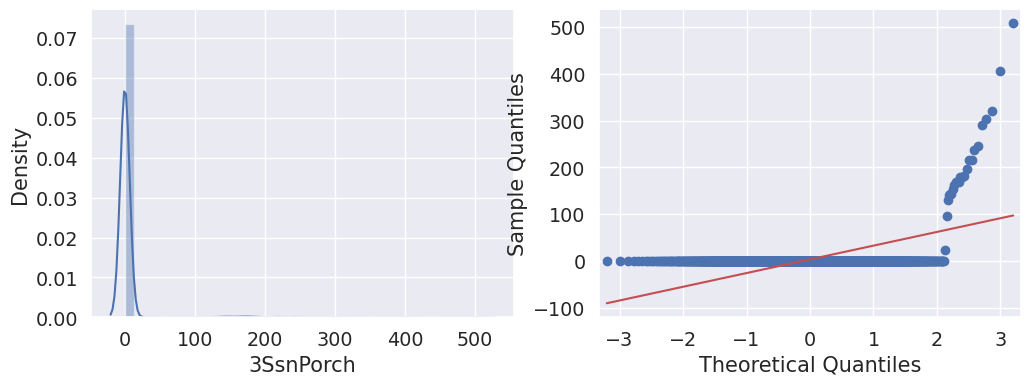

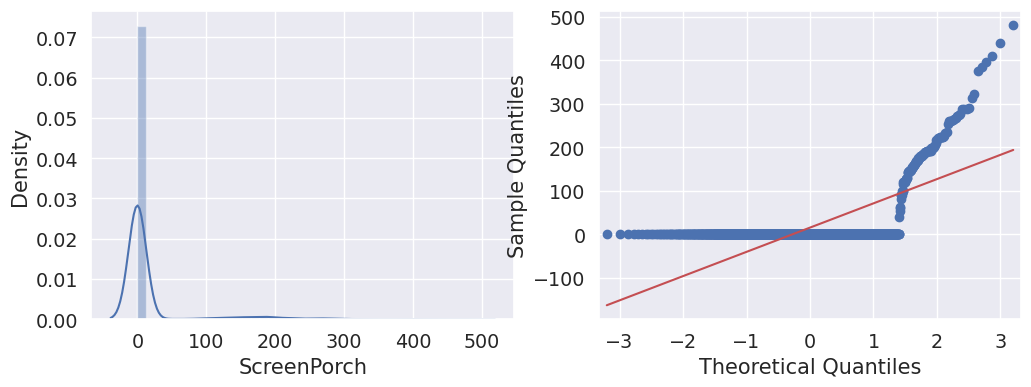

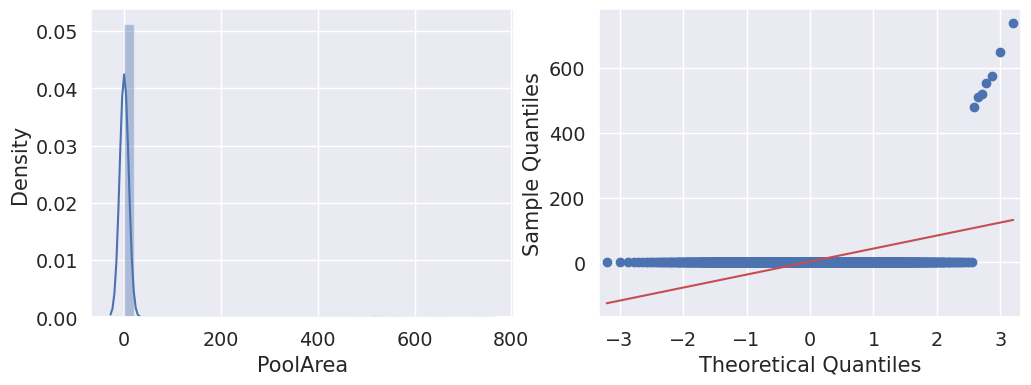

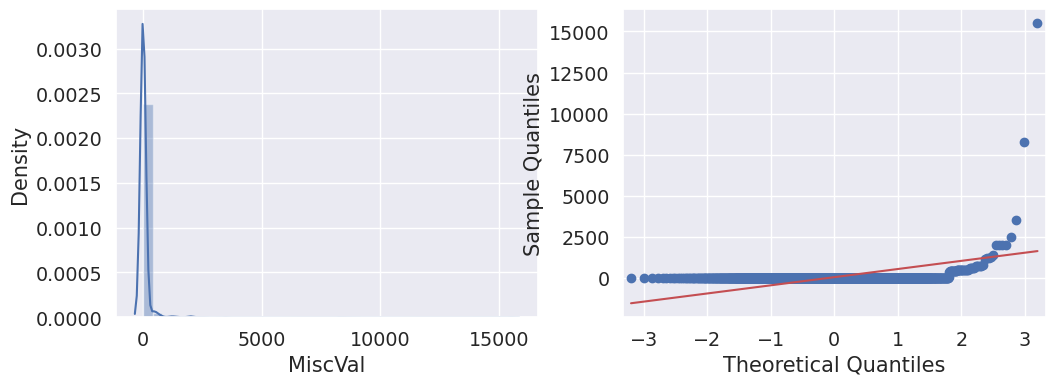

In [236]:
import statsmodels.api as sm

look_into_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for var in look_into_vars:
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    sns.distplot(df_num[var], ax=ax1)
    sm.qqplot(df_num[var], line='s', ax=ax2)
    plt.show()


Aqui, conseguimos avaliar as distribuições dos dados que mais chamaram a atenção, ao lado de um QQplot, um tipo de gráfico especial que compara a distribuição dos dados a uma distribuição conhecida (no caso, a Normal). É interessante, para variáveis com muitos outliers, avaliar a possibilidade de realizar uma transformação logarítmica, como fizemos com a variável resposta, assim como as altamente assimétricas. Para o modelo de regressão linear, por exemplo, é importante que os dados sejam normalmente distribuídos, e a transformação logarítmica pode ajudar nisso. Vamos avaliar algumas dessas variáveis após uma transformação.

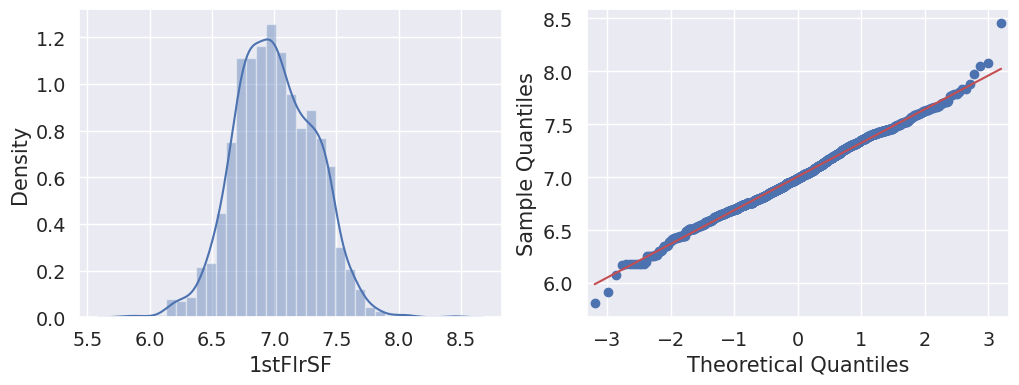

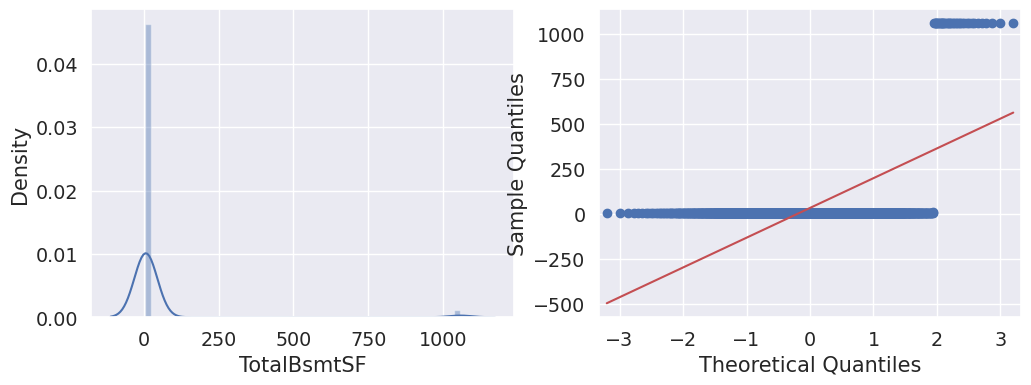

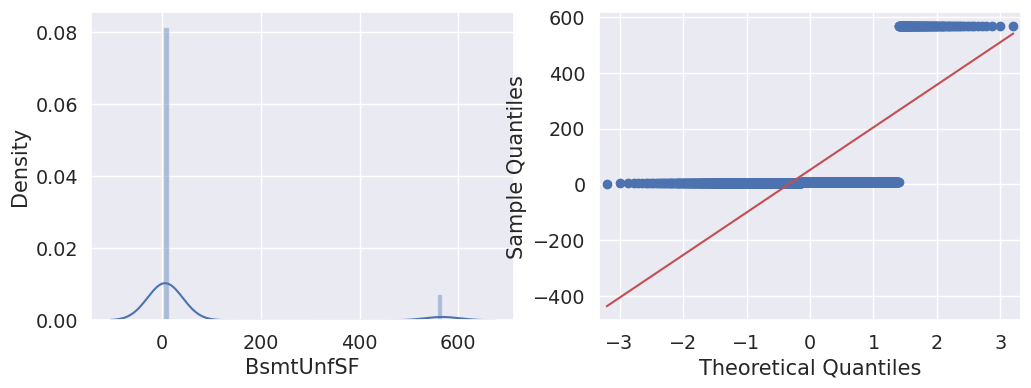

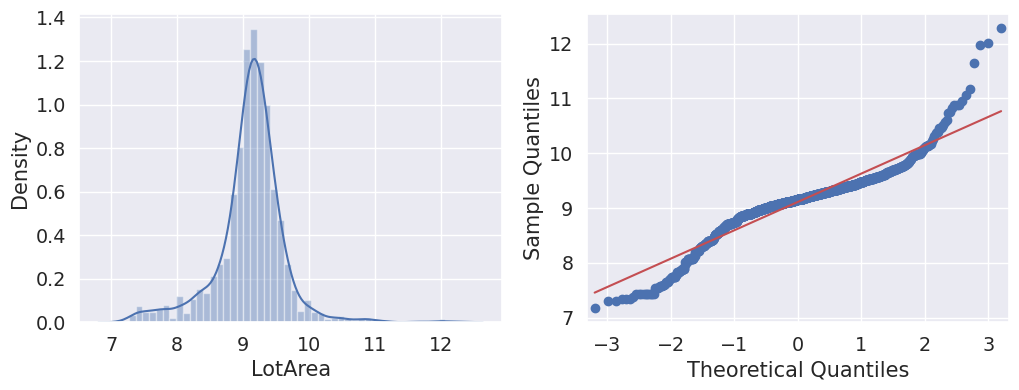

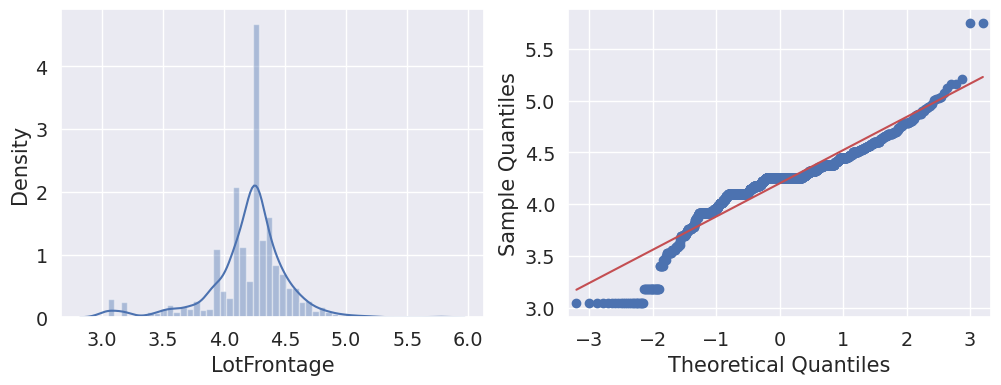

In [237]:
var_transformar = ['1stFlrSF','TotalBsmtSF', 'BsmtUnfSF', 'LotArea', 'LotFrontage']

# Vamos realizar a transformação no dataset original e de treino.
for var in var_transformar:
    df[var] = np.log(df_num[var])
    df[var].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[var].fillna(df_num[var].mean(), inplace=True)
    df_t[var] = np.log(df_t[var])
    df_t[var].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_t[var].fillna(df_num[var].mean(), inplace=True)

df_num = df.select_dtypes(exclude='object')
    
for var in var_transformar:
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    sns.distplot(df_num[var], ax=ax1)
    sm.qqplot(df_num[var], line='s', ax=ax2)
    plt.show()

Também é interessante verificarmos as variáveis com altas concentrações de valores zerados. Seria interessante avaliar a possibilidade de transformar essas variáveis em variáveis binárias, indicando a presença ou ausência de tal item, ou até uma variável ordinal, indicando a presença e tamanho ou qualidade de tal item, porém dividindo-a em categorias. Contudo, precisamos ficar atentos, pois algumas variáveis com altas concentrações de valores zerados podem trazer informações importantes, como `2ndFlrSF`; é certamente importante levarmos em consideração o tamanho de um segundo andar, e não apenas sua existência, no modelo. Vamos avaliar algumas dessas variáveis.

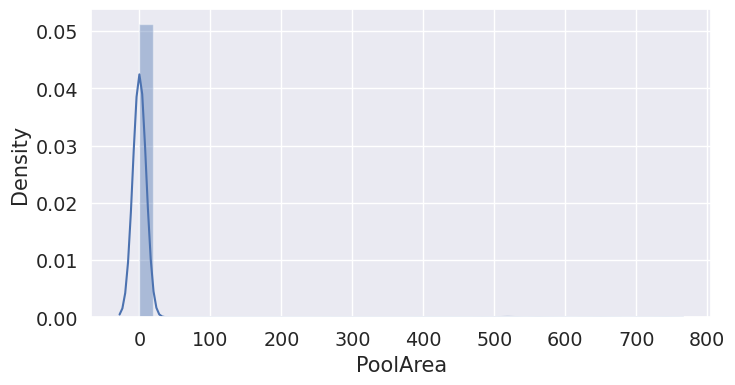

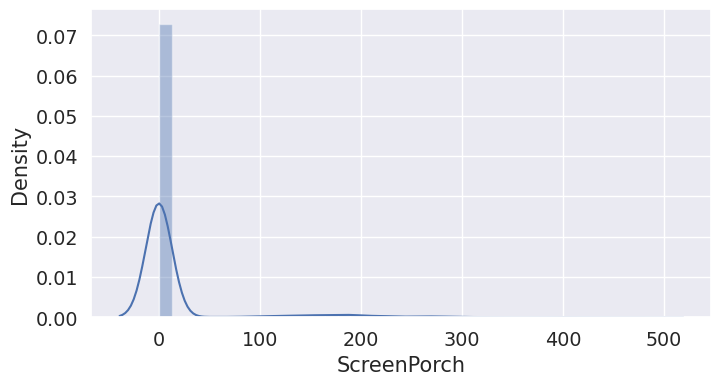

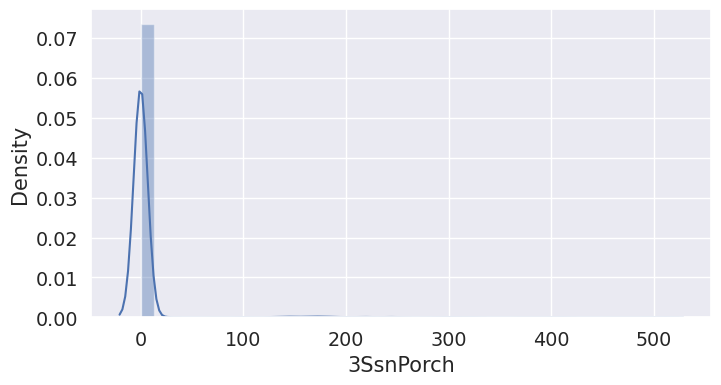

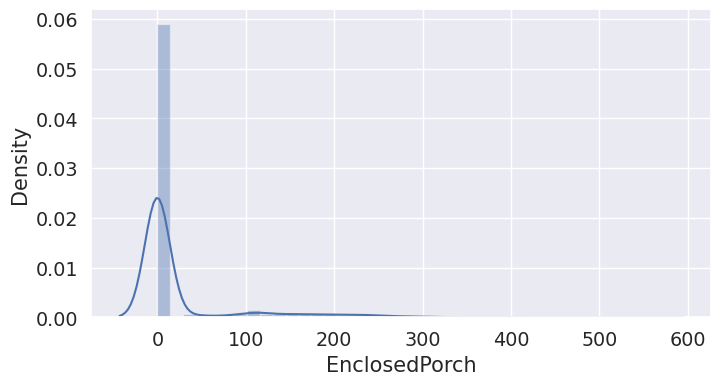

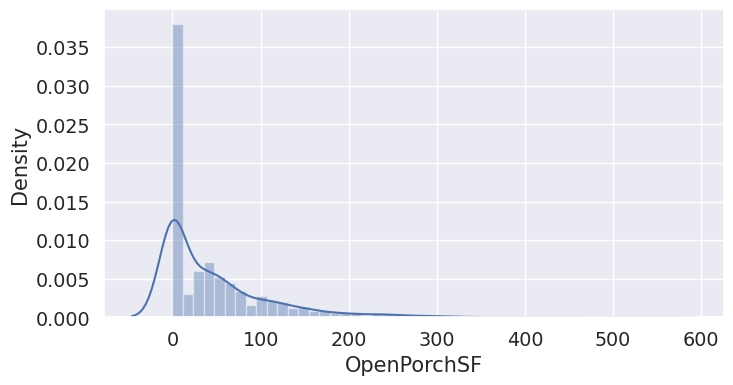

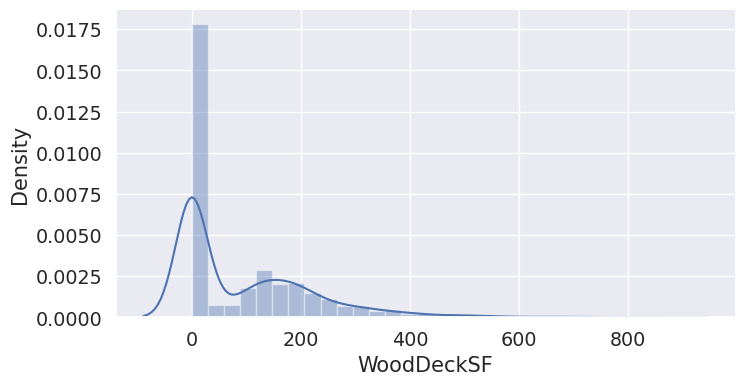

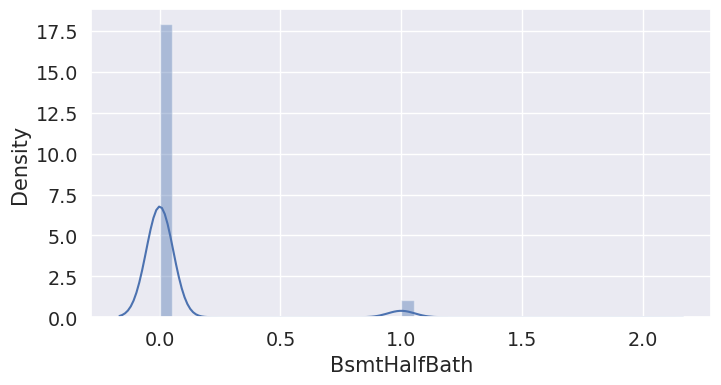

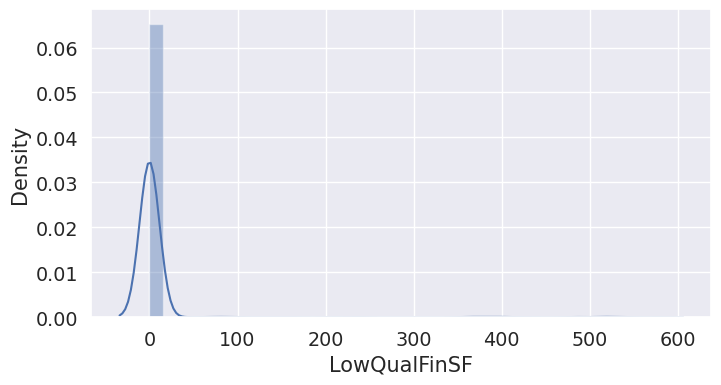

In [238]:
vars_zero = ['PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'BsmtHalfBath', 'LowQualFinSF']

for var in vars_zero:
    plt.figure(figsize=(8,4))
    sns.distplot(df_num[var])
    plt.show()

In [239]:
# Removendo os desnecessários.
df.drop('PoolArea', axis=1, inplace=True)
df_t.drop('PoolArea', axis=1, inplace=True)

# Criando as variáveis binárias.
df['ScreenPorch_bin'] = np.where(df['ScreenPorch'] > 0, 1, 0)
df['3SsnPorch'] = np.where(df['3SsnPorch'] > 0, 1, 0)
df['EnclosedPorch'] = np.where(df['EnclosedPorch'] > 0, 1, 0)
df['LowQualFinSF'] = np.where(df['LowQualFinSF'] > 0, 1, 0)
df_t['ScreenPorch_bin'] = np.where(df_t['ScreenPorch'] > 0, 1, 0)
df_t['3SsnPorch'] = np.where(df_t['3SsnPorch'] > 0, 1, 0)
df_t['EnclosedPorch'] = np.where(df_t['EnclosedPorch'] > 0, 1, 0)
df_t['LowQualFinSF'] = np.where(df_t['LowQualFinSF'] > 0, 1, 0)

# Criando variáveis com bins.
df['OpenPorchSF_bin'] = pd.cut(df['OpenPorchSF'], bins=[-1, 0, 100, 200, 500], labels=[0, 1, 2, 3])
df['WoodDeckSF_bin'] = pd.cut(df['WoodDeckSF'], bins=[-1, 0, 100, 200, 500], labels=[0, 1, 2, 3])
df_t['OpenPorchSF_bin'] = pd.cut(df_t['OpenPorchSF'], bins=[-1, 0, 100, 200, 500], labels=[0, 1, 2, 3])
df_t['WoodDeckSF_bin'] = pd.cut(df_t['WoodDeckSF'], bins=[-1, 0, 100, 200, 500], labels=[0, 1, 2, 3])

df_num = df.select_dtypes(exclude='object')

df_num[['ScreenPorch_bin', '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'OpenPorchSF_bin', 'WoodDeckSF_bin']].head()

,ScreenPorch_bin,3SsnPorch,EnclosedPorch,LowQualFinSF,OpenPorchSF_bin,WoodDeckSF_bin
0,0,0,0,0,1,0
1,0,0,0,0,0,3
2,0,0,0,0,1,0
3,0,0,1,0,1,0
4,0,0,0,0,1,2


Criamos 4 variáveis binárias, indicando presença ou ausência de feature, além de 2 variáveis ordinais separadas em categorias. Ademais, excluímos a variável de área de piscina, pois a presença ou não de piscina já está representada na variável `PoolQC`. Por fim, observando a matriz de correlação, temos que há uma variável altamente correlacionada com outra semelhante. Para evitar problemas de multicolinearidade, vamos excluir a variável `GarageArea`, e em seguida, avaliar algumas variáveis categóricas.

In [240]:
df.drop('GarageArea', axis=1, inplace=True)
df_t.drop('GarageArea', axis=1, inplace=True)

### 2.2. Analisando variáveis categóricas

Para variáveis categóricas, geralmente utilizamos gráficos de barras para visualização. Vamos avaliar algumas variáveis categóricas com gráficos de barras, e em seguida, avaliar a relação entre as variáveis categóricas e a variável resposta. Os modelos, geralmente, não lidam bem com variáveis categóricas, portanto é necessário transformá-las em variáveis numéricas. Existem diversas técnicas para isso, como One-Hot Encoding, Label Encoding, Target Encoding, etc. Vamos avaliar todas as variáveis para entender como podemos transformá-las. 

In [241]:
df_cat = df.select_dtypes(include='object')
df_cat['SalePrice'] = df['SalePrice']
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,208500
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,None,None,None,WD,Normal,181500
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,223500
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,None,None,None,WD,Abnorml,140000
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,None,None,None,WD,Normal,250000


In [242]:
df_cat.shape

(1460, 44)

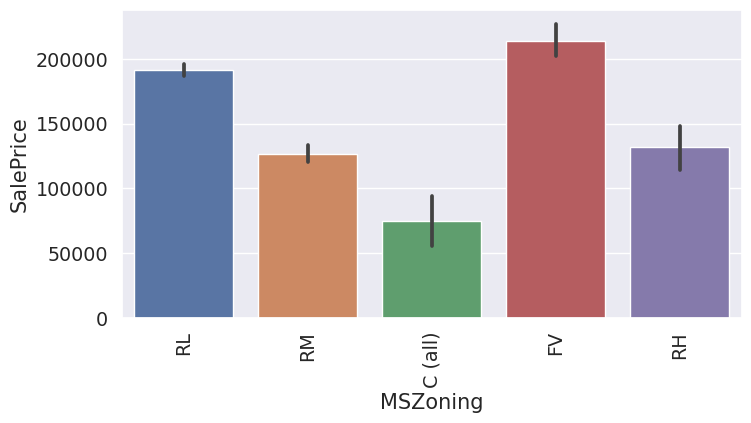

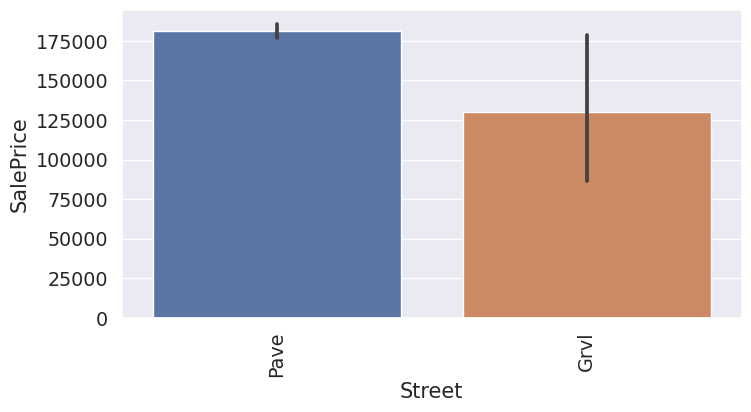

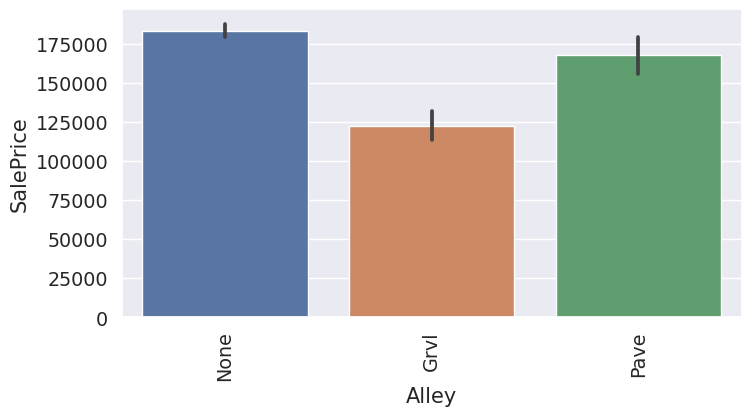

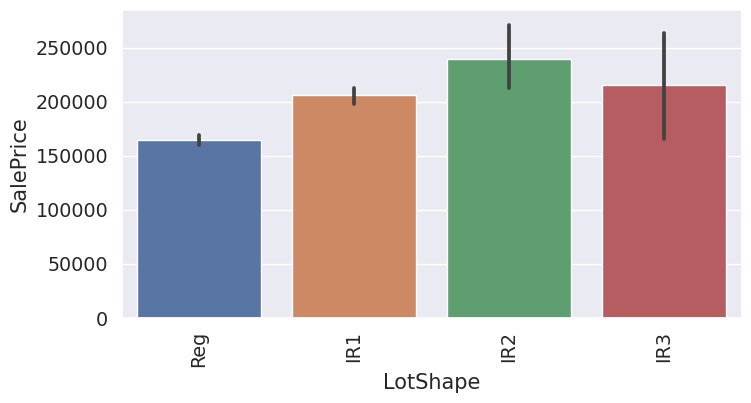

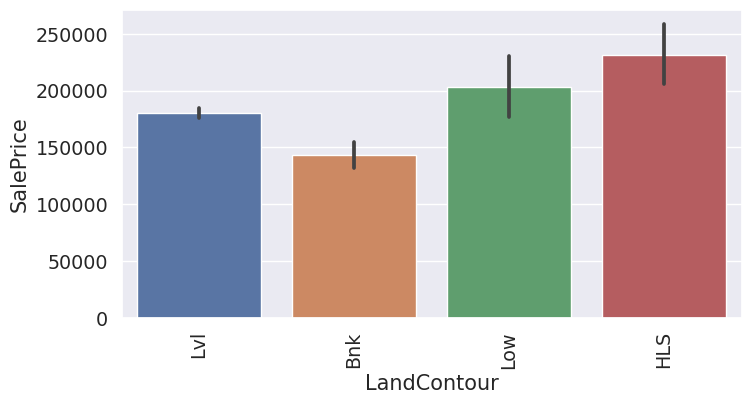

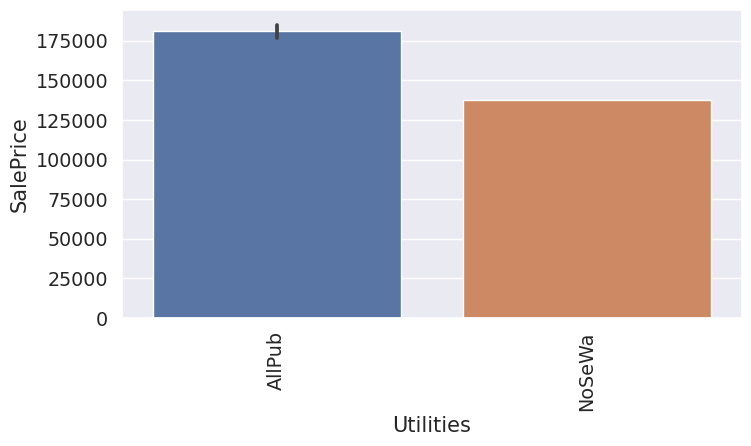

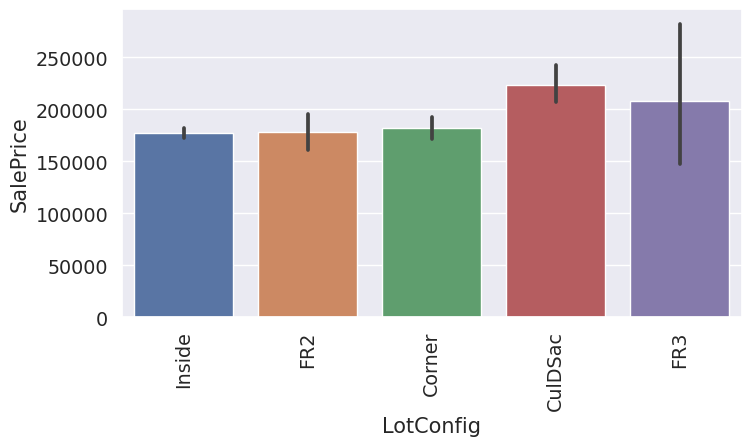

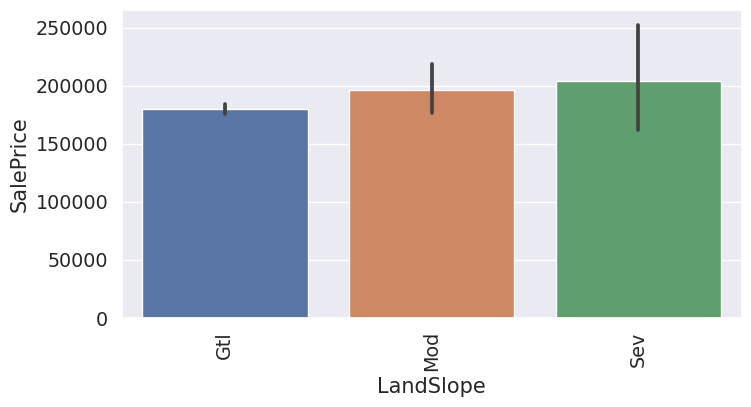

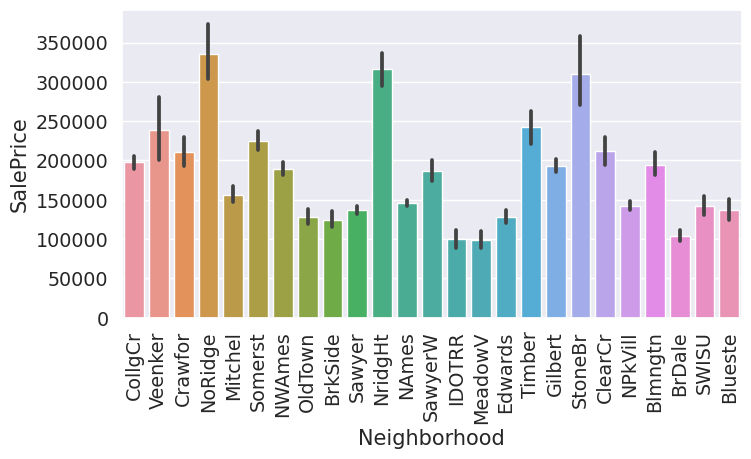

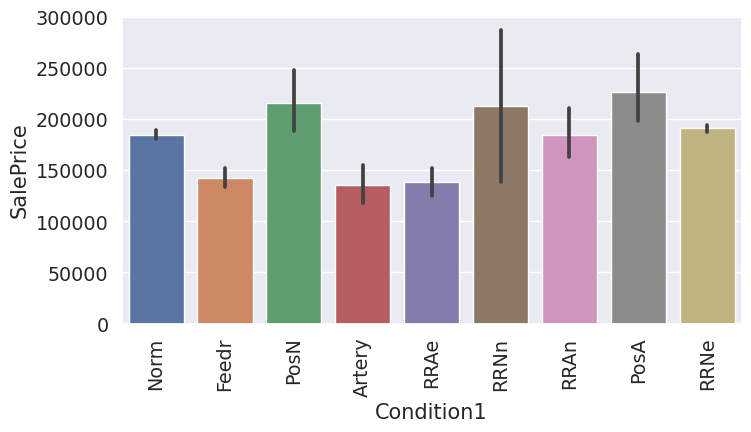

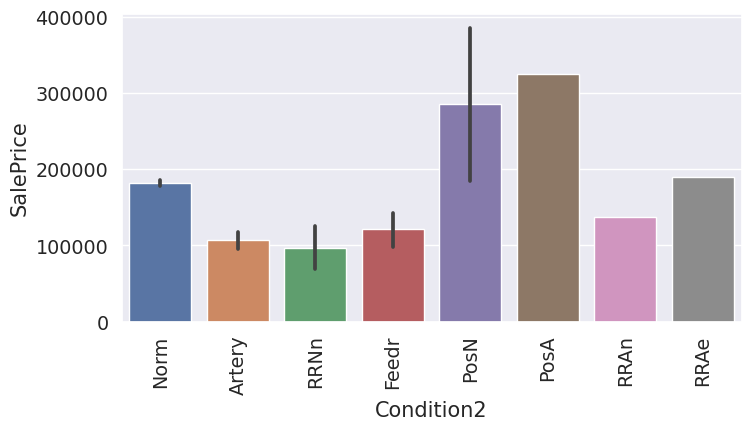

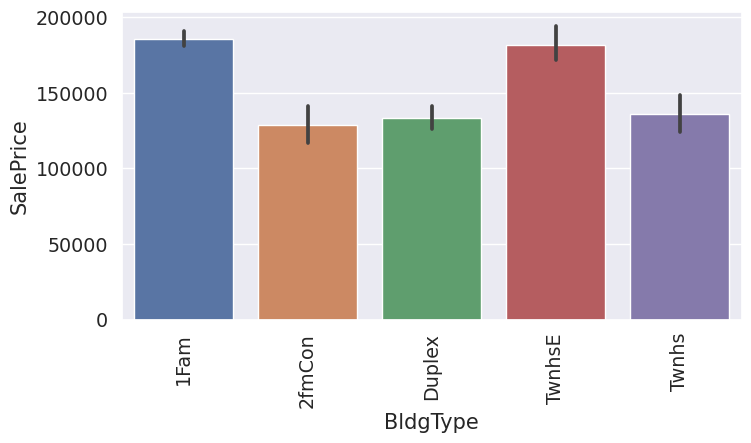

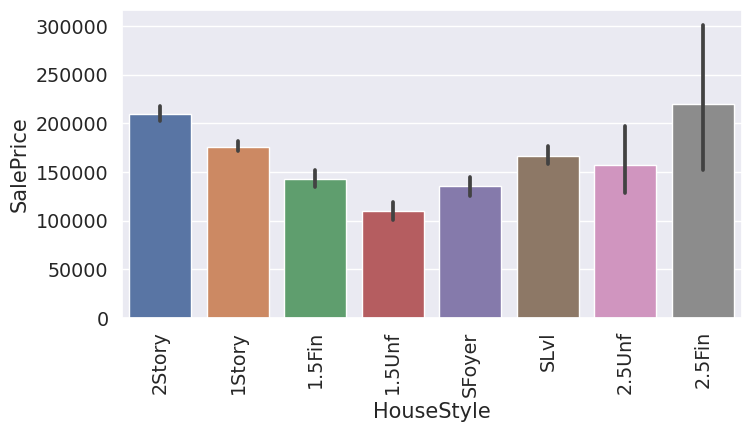

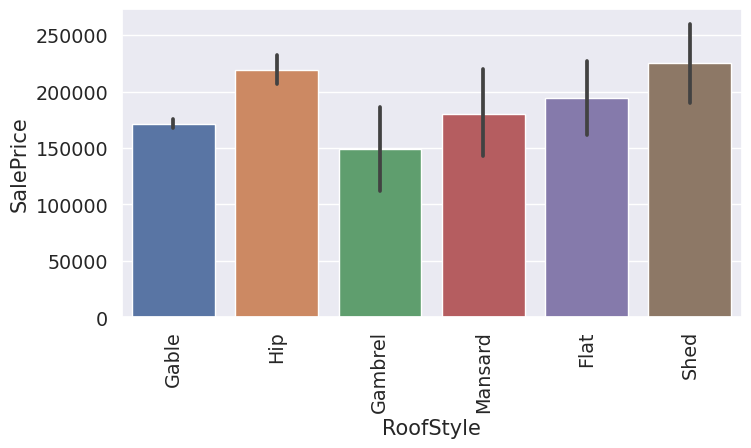

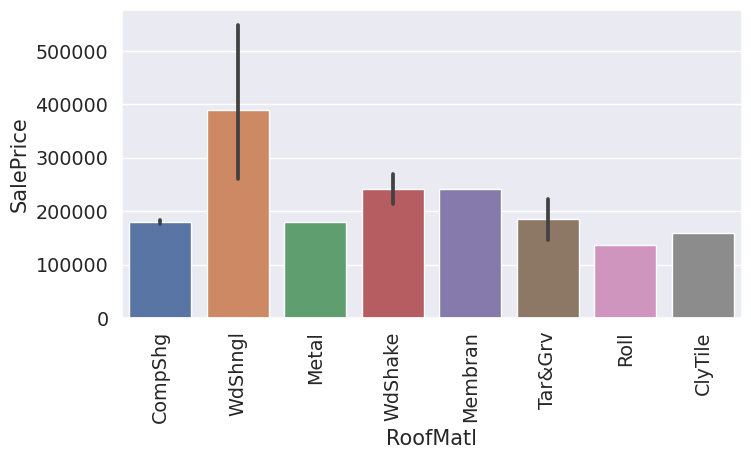

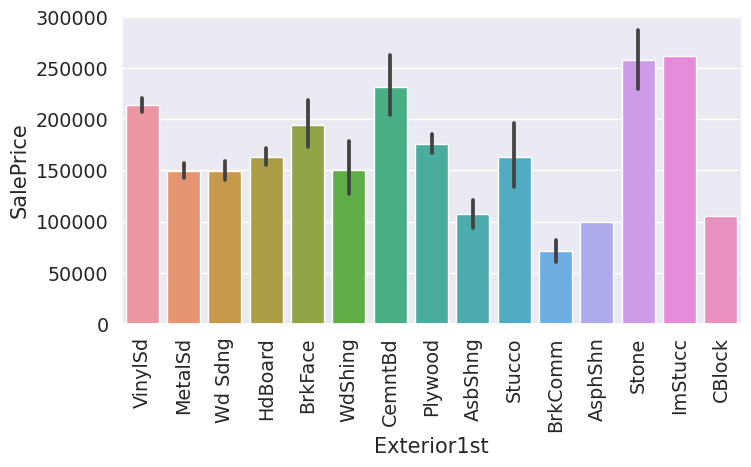

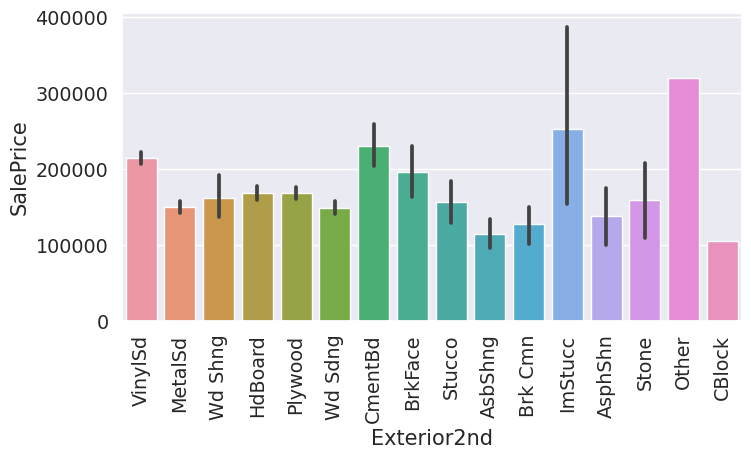

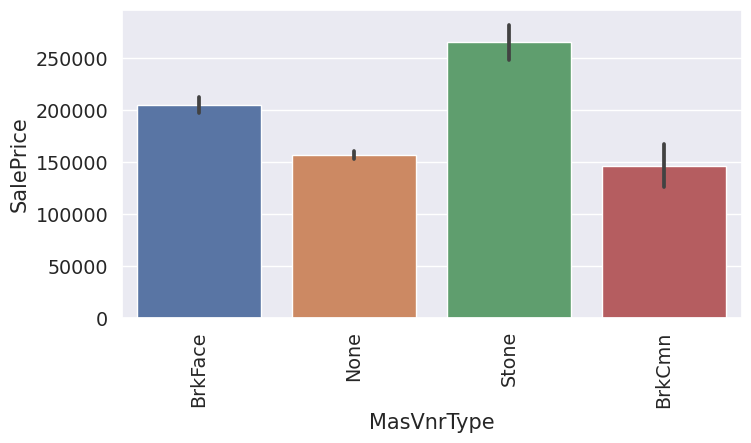

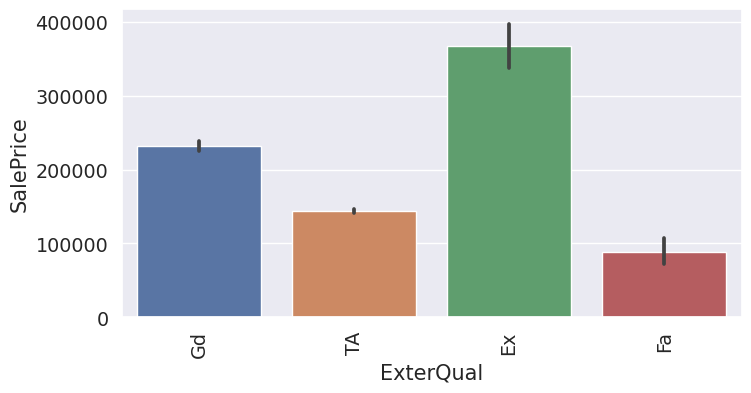

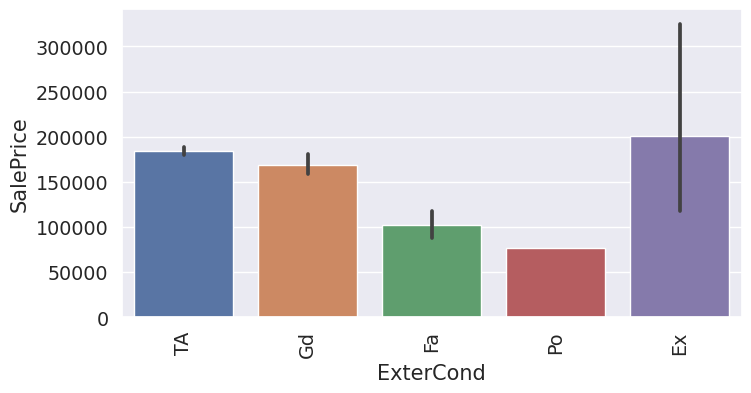

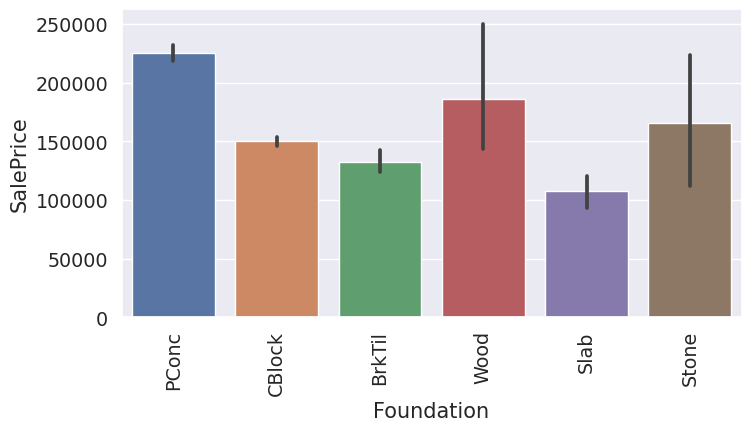

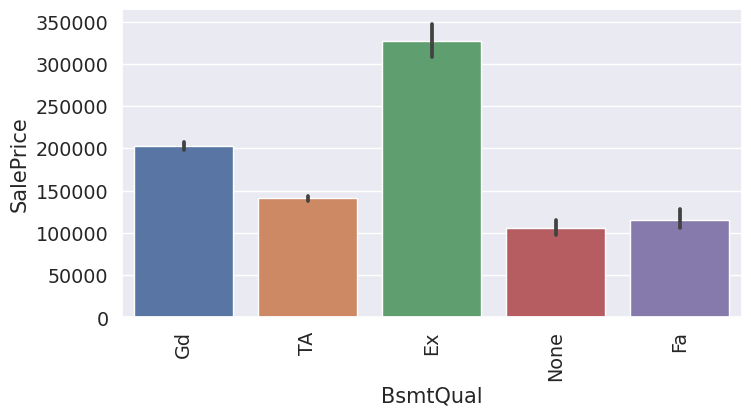

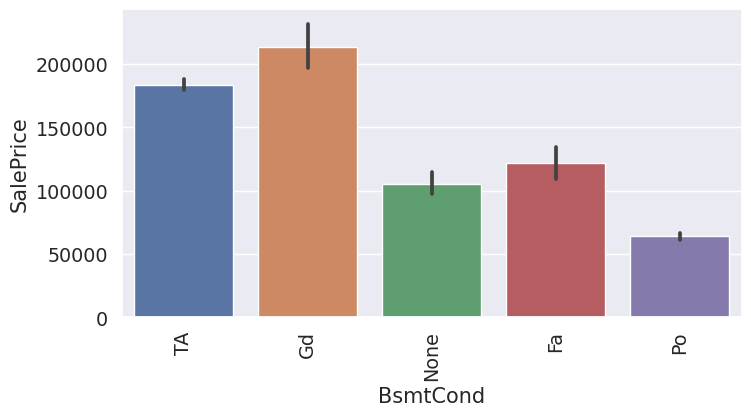

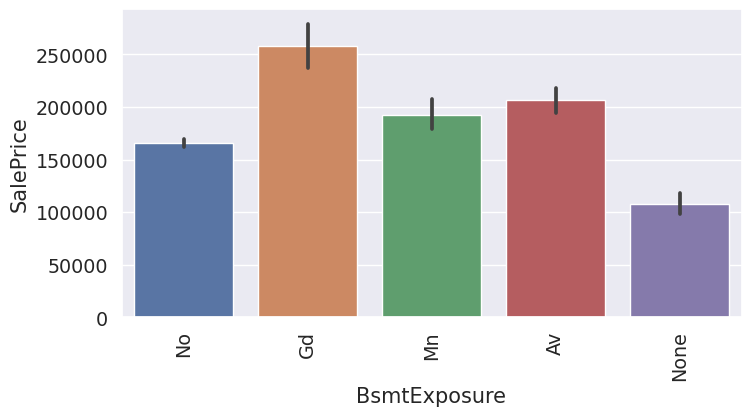

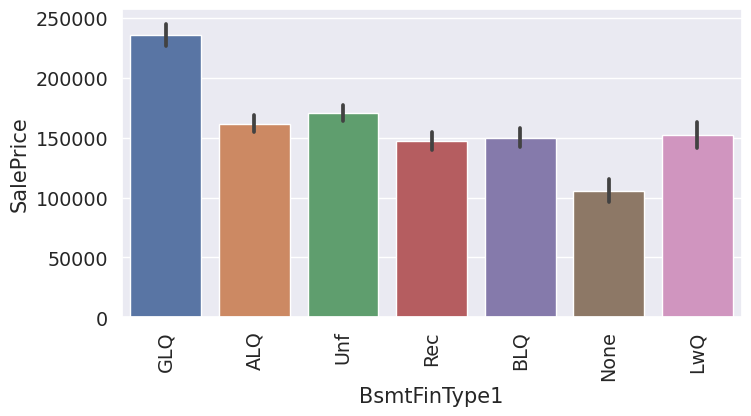

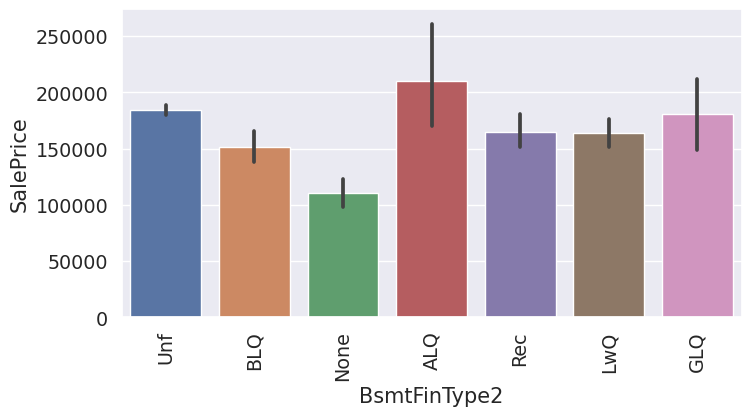

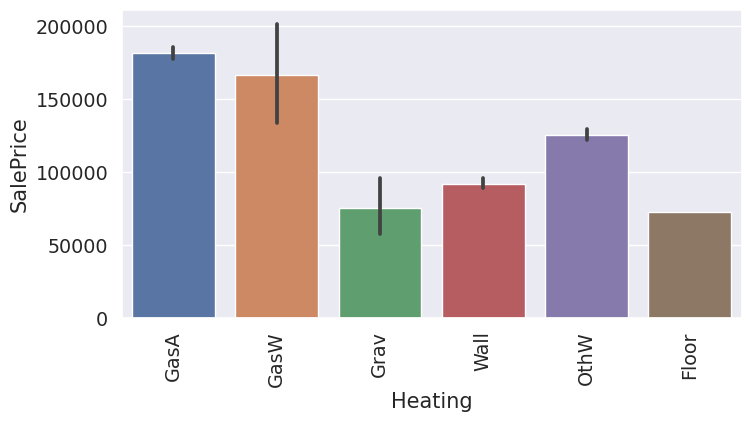

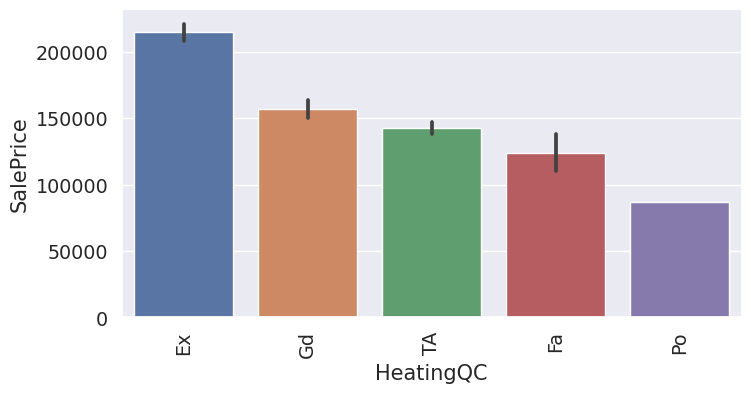

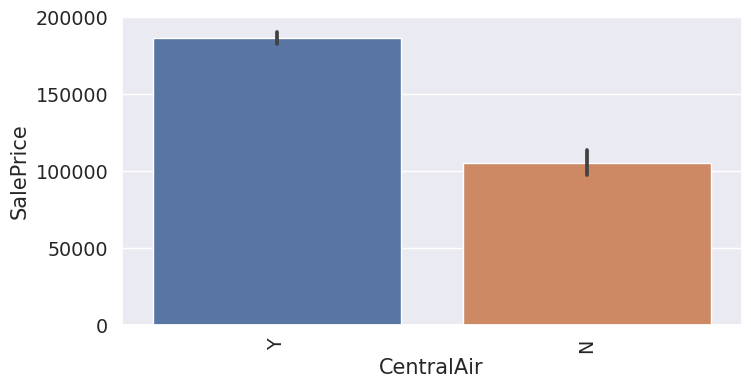

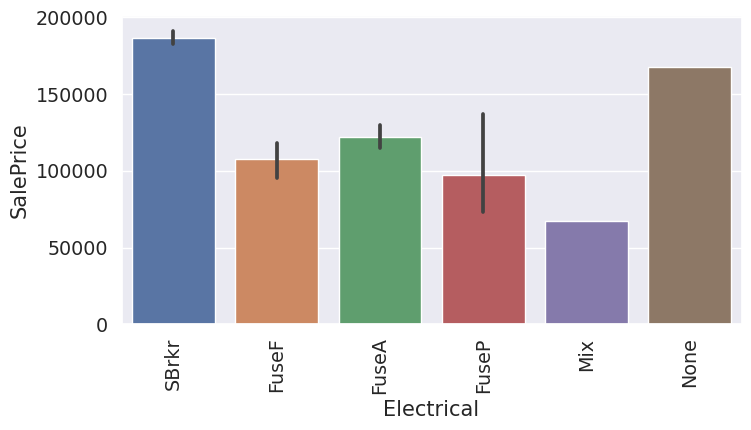

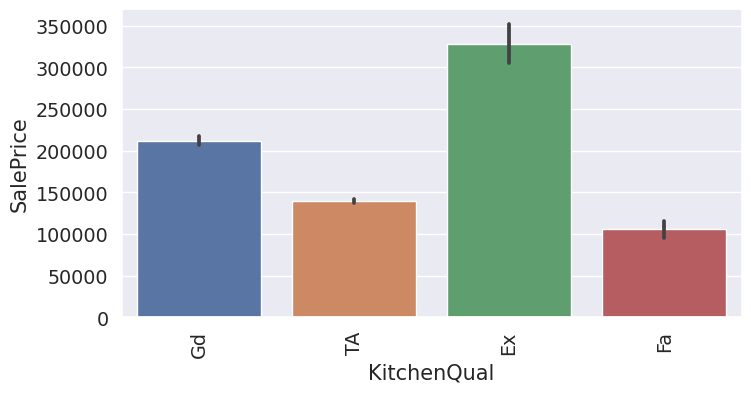

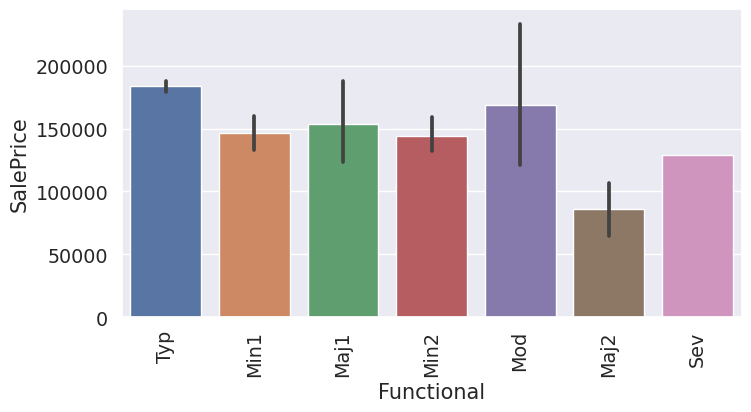

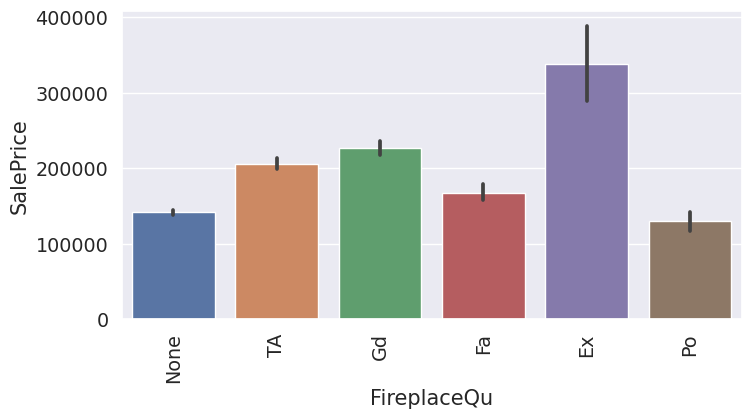

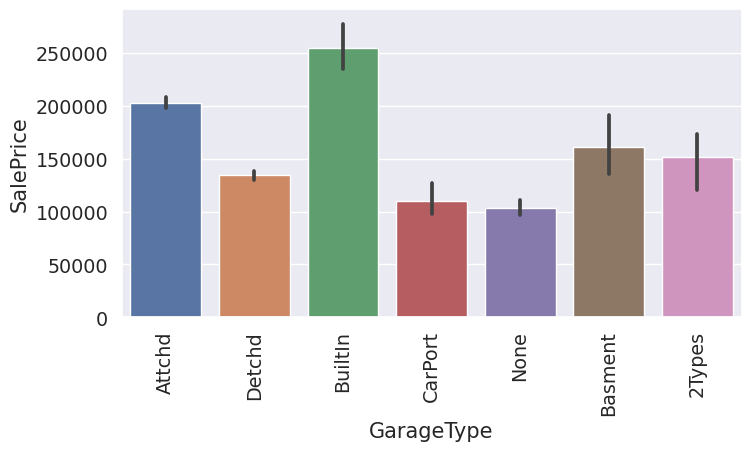

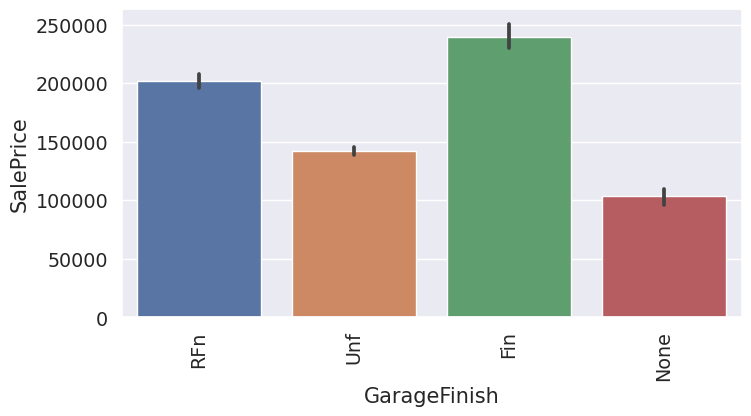

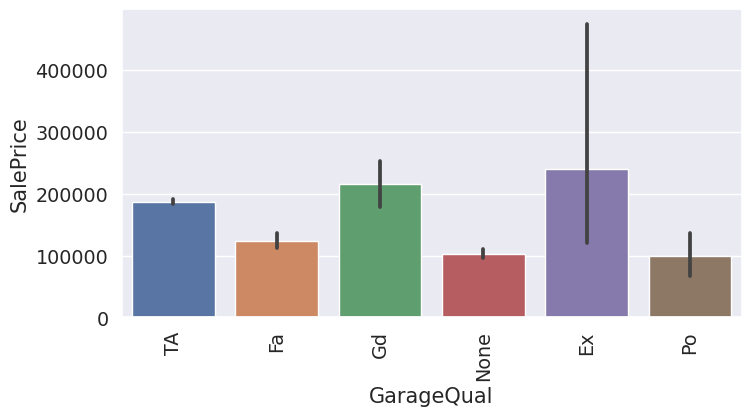

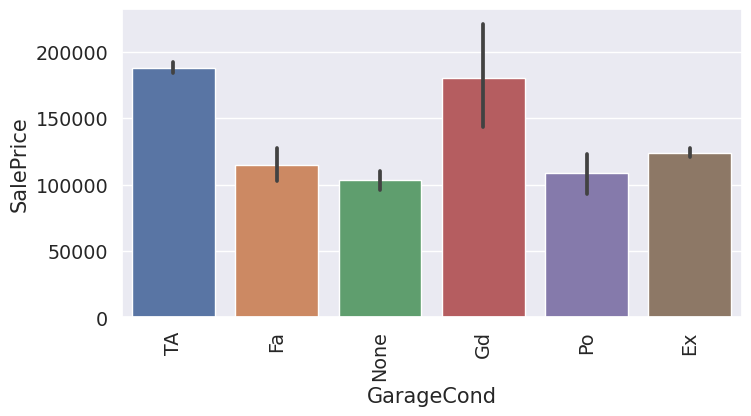

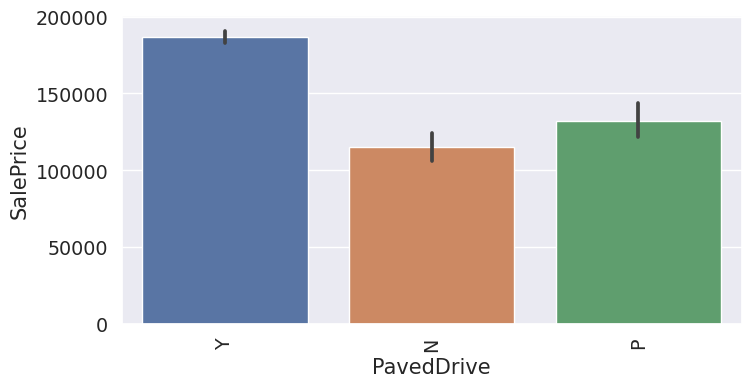

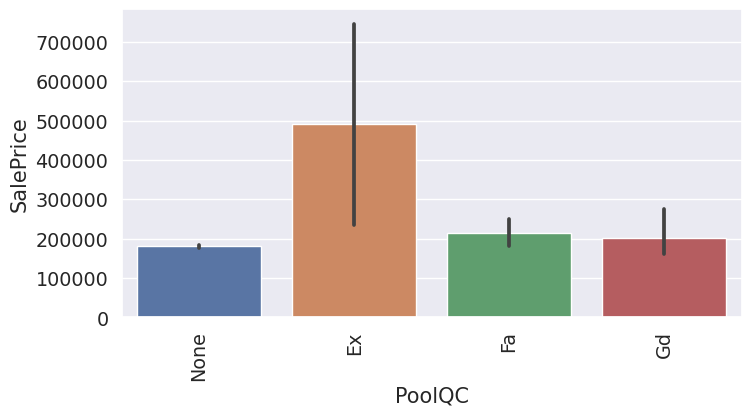

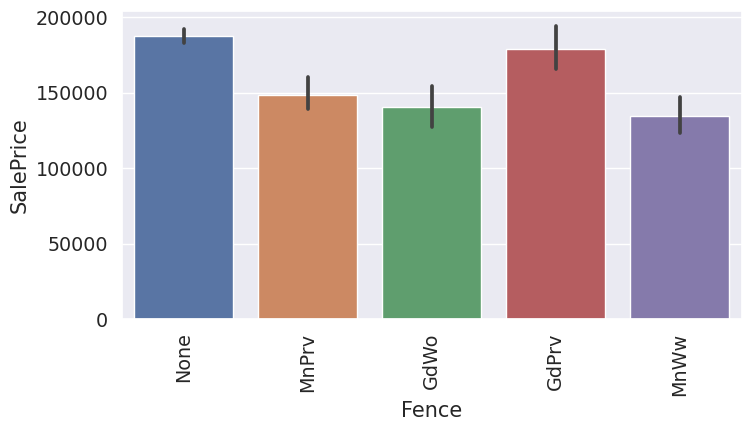

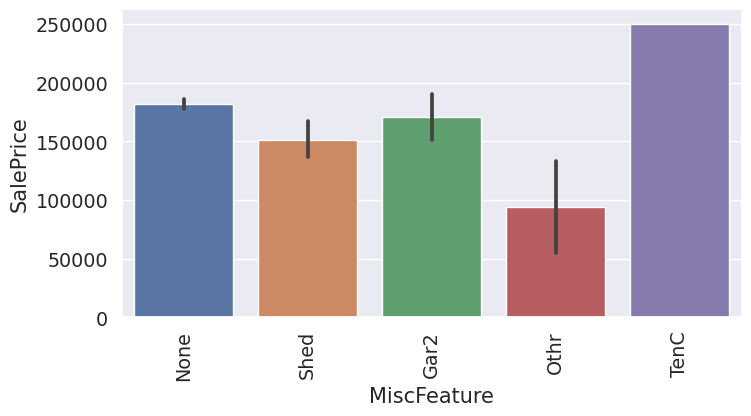

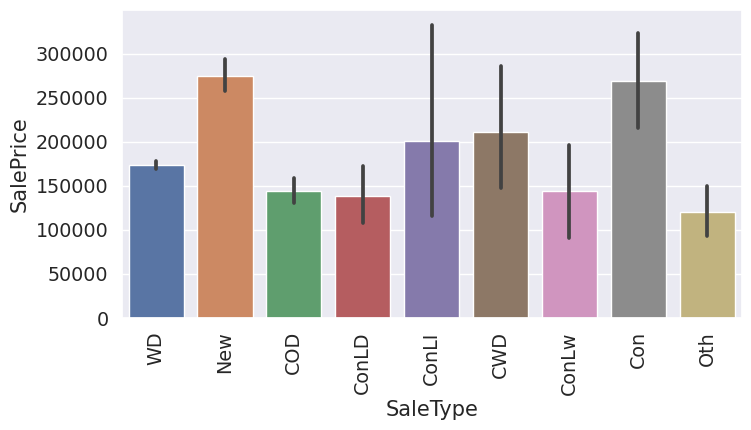

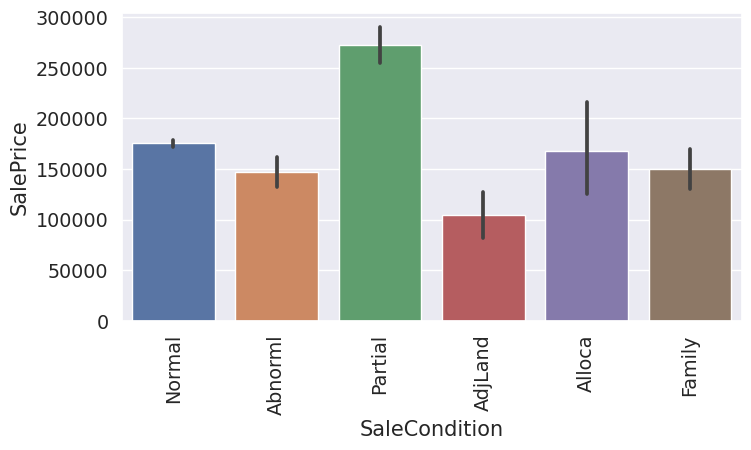

In [243]:
for var in var_cat:
    plt.figure(figsize=(8,4))
    sns.barplot(x=var, y='SalePrice', data=df_cat)
    plt.xticks(rotation=90)
    plt.show()

As variáveis categóricas possuem grande importância no modelo. Algumas irão ser codificadas com One-Hot Encoder (para mais informações teóricas, acesse a guia de apoio de Álgebra Linear). Outras, que representam uma ordem, serão codificadas com Label Encoder. Outras, que possuem uma relação com a variável resposta, serão codificadas com Target Encoder. Por fim, algumas serão excluídas, pois não possuem uma relação clara com a variável resposta. Caso queira aprofundar na seleção de features categóricas, consulte a bibliografia complementar, especialmente seções relacionadas a Testes de Hipótese, ANOVA e afins (ou me pergunte também, sou um geek de estatística então muito provavelmente vou conseguir te ajudar 🙂).

O Target Encoder é útil quando você acredita que a variável categórica tem uma relação informativa com a variável de destino e deseja incorporar essa relação no modelo. No entanto, é importante usá-lo com cautela, pois pode introduzir vazamento de dados (data leakage) se não for aplicado corretamente. É mais apropriado quando você tem um grande conjunto de dados e categorias bem representadas. O Label Encoder é apropriado quando você lida com variáveis categóricas ordinais, ou seja, categorias que têm uma relação de ordem específica, como "baixo", "médio" e "alto". Ele pode ser usado para transformar essas categorias em valores inteiros que refletem essa ordem. O OHE é adequado quando as categorias não têm uma ordem específica e não existe uma relação ordinal entre elas. É especialmente útil quando você não deseja atribuir nenhuma ordem implícita às categorias.

Vamos agora identificar quais são as features que iremos aplicar One-Hot Encoder, e qual iremos aplicar Label Encoder. Para isso, vamos, primeiramente, avaliar a cardinalidade de cada feature, ou seja, quantos valores únicos ela possui.



In [244]:
dict_card = {}
for var in var_cat:
    dict_card[var] = df[var].nunique()
df_card = pd.DataFrame.from_dict(dict_card, orient='index', columns=['Cardinalidade'])
df_card.sort_values(by='Cardinalidade', ascending=False)


,Cardinalidade
Neighborhood,25
Exterior2nd,16
Exterior1st,15
SaleType,9
Condition1,9
Condition2,8
HouseStyle,8
RoofMatl,8
BsmtFinType2,7
Functional,7


Observamos que a variável `Neighborhood` possui uma alta cardinalidade, porém ainda é interessante mantê-la no modelo; observando os gráficos, podemos ver que ela possui uma relação clara com a variável resposta. Vamos aplicar o Label Encoder em todas as variáveis que incluem `Qual`, `Cond` ou `QC`, pois todas indicam que existe uma ordem de qualidade ou condição. Ademais, vamos avaliar mais a fundo a variável `Neighborhood`, avaliando as médias de preço de cada bairro e verificando se há uma relação clara entre a variável e a variável resposta.

In [245]:
df_cat.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

Podemos ver que o bairro possui uma relação clara com o preço.

In [248]:
l_encoder = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'PoolQC', 'Fence', 
             'ExterCond', 'BsmtCond', 'GarageCond']
oh_encoder = [var for var in var_cat if var not in l_encoder]

print(f'Label Encoder: {len(l_encoder)}')
print(f'One Hot Encoder: {len(oh_encoder)}')

Label Encoder: 11
One Hot Encoder: 32


In [252]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder
le = LabelEncoder()
for var in l_encoder:
    df[var] = le.fit_transform(df[var])
    df_t[var] = le.fit_transform(df_t[var])

# One Hot Encoder
df = pd.get_dummies(df, columns=oh_encoder, drop_first=True)
df_t = pd.get_dummies(df_t, columns=oh_encoder, drop_first=True)

In [253]:
df_cat = df.select_dtypes(include='object')
df_cat

""
0
1
2
3
4
...
1455
1456
1457
1458


In [254]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,4.174387,9.041922,7,5,2003,2003,196.0,2,...,False,False,False,False,True,False,False,False,True,False
1,2,20,4.382027,9.169518,6,8,1976,1976,0.0,3,...,False,False,False,False,True,False,False,False,True,False
2,3,60,4.219508,9.328123,7,5,2001,2002,162.0,2,...,False,False,False,False,True,False,False,False,True,False
3,4,70,4.094345,9.164296,7,5,1915,1970,0.0,3,...,False,False,False,False,True,False,False,False,False,False
4,5,60,4.430817,9.565214,8,5,2000,2000,350.0,2,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4.127134,8.976768,6,5,1999,2000,0.0,3,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,4.442651,9.486076,6,6,1978,1988,119.0,3,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,4.189655,9.109636,7,9,1941,2006,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,4.219508,9.181632,5,6,1950,1996,0.0,3,...,False,False,False,False,True,False,False,False,True,False


In [256]:
PATH = os.path.join('data', 'house-prices', 'df.xlsx')
df.to_excel(PATH, index=False)

Salvamos nossa base de dados analisada e pré-processada como Excel, para que vocês consigam visualizar melhor os dados. Recomendo que passem, mesmo que rapidamente, pelos dados e vejam como eles estão agora, se encontram alguma incongruência (afinal, ninguém é de ferro) e se conseguem entender o que cada variável representa. Como são muitas variáveis, é normal que algumas não façam sentido para nós, mas é importante que façam sentido para o modelo.

No próximo notebook, elaboraremos um pipeline para realizar todas as atividades de processamento de dados que realizamos aqui, e começaremos a usar os modelos propriamente ditos. Até lá!

Repository under MIT License. Copyright &copy; 2023 Thomas Chiari Ciocchetti de Souza